# **<span style = "color:darkblue;">Prediction of Price Movements in Market Microstructure</span>**
##### **<span style = "color:red;">Creating the dataframes that will be used</span>**



In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from mpl_toolkits.mplot3d import Axes3D

In [666]:
df_final = pd.read_csv('/Users/shpetimtafili/Desktop/Advanced Data Analysis/Project ADA/bid_ask_price_final.csv')


In [667]:
df_final

AAPL.O Timestamp  AAPL.O.1 Ask Close  AAPL.O.2 Ask Size  \
0     2024-05-14 16:30:00              187.03          3260600.0   
1     2024-05-14 16:25:00              186.98          3796300.0   
2     2024-05-14 16:20:00              186.73          2965500.0   
3     2024-05-14 16:15:00              186.80          3038800.0   
4     2024-05-14 16:10:00              186.98          4606600.0   
...                   ...                 ...                ...   
5997  2024-04-01 12:25:00              171.88             2100.0   
5998  2024-04-01 12:20:00              171.88              500.0   
5999  2024-04-01 12:15:00              171.88             1000.0   
6000                  NaN                 NaN                NaN   
6001                  NaN                 NaN                NaN   

      AAPL.O.3 Bid Close  AAPL.O.4 Bid Size  AAPL.O.5 Target Close  \
0                 187.00          3131800.0                    NaN   
1                 186.96          4298100.0               186.9600   
2                 186.72          3115000.0               186.7299   
3                 186.79          3403200.0               186.7966   
4                 186.97          5660300.0               186.9800   
...                  ...                ...                    ...   
5997              171.75             2000.0                    NaN   
5998              171.79              500.0                    NaN   
5999                 NaN                NaN                    NaN   
6000                 NaN                NaN                    NaN   
6001                 NaN                NaN                    NaN   

            ABT Timestamp  ABT.1 Ask Close  ABT.2 Ask Size  ABT.3 Bid Close  \
0     2024-05-14 16:45:00           104.47         38200.0           104.44   
1     2024-05-14 16:40:00           104.46        244200.0           104.43   
2     2024-05-14 16:35:00           104.49        163700.0           104.47   
3     2024-05-14 16:30:00           104.56        244200.0           104.53   
4     2024-05-14 16:25:00           104.54        226900.0           104.52   
...                   ...              ...             ...              ...   
5997  2024-03-14 11:35:00           121.14         39000.0              NaN   
5998  2024-03-14 11:30:00           121.20          4500.0              NaN   
5999  2024-03-14 11:25:00           121.20           900.0              NaN   
6000                  NaN              NaN             NaN              NaN   
6001                  NaN              NaN             NaN              NaN   

      ...  PG.2 Ask Size  PG.3 Bid Close PG.4 Bid Size  PG.5 Target Close  \
0     ...       149600.0          164.11      175800.0           164.1200   
1     ...       158500.0          164.23      325700.0           164.2301   
2     ...       162200.0          164.40      245900.0           164.4123   
3     ...       153500.0          164.39      241400.0           164.3989   
4     ...        97700.0          164.47      157000.0           164.4800   
...   ...            ...             ...           ...                ...   
5997  ...       365400.0             NaN           NaN                NaN   
5998  ...       271300.0             NaN           NaN                NaN   
5999  ...       302500.0             NaN           NaN                NaN   
6000  ...      5329700.0             NaN           NaN                NaN   
6001  ...            NaN             NaN           NaN                NaN   

         TSLA.O Timestamp  TSLA.O.1 Ask Close  TSLA.O.2 Ask Size  \
0     2024-05-14 17:45:00              178.30           851400.0   
1     2024-05-14 17:40:00              178.33          2707500.0   
2     2024-05-14 17:35:00              178.32          1808500.0   
3     2024-05-14 17:30:00              178.94          2275000.0   
4     2024-05-14 17:25:00              178.95          1940500.0   
...                   ...                 ...                ...   
5

In [668]:
# Create a dictionary to store each company's DataFrame
company_dataframes = {}

companies = ['AAPL.O', 'ABT', 'IBM', 'ADBE.O', 'BIIB', 'TTWO', 'COST', 'EBAY', 'INTC.O', 'NVDA.O', 'XOM', 'CVX', 'PG', 'TSLA.O']

# Extract and process data for each company
for company in companies:
    # Select columns related to the company
    company_columns = [col for col in df_final.columns if col.startswith(company)]
    company_df = df_final[company_columns].dropna()

    # Rename columns to remove the company prefix
    company_df.columns = [col.replace(f'{company}.', '') for col in company_df.columns]

    # Set the timestamp column as the index
    timestamp_col = f'{company} Timestamp'
    company_df = company_df.set_index(timestamp_col)

    # Sort the DataFrame by the timestamp column in ascending order
    company_df = company_df.sort_index(ascending=True).tail(3000)

    # Store the DataFrame in the dictionary
    company_dataframes[company] = company_df.astype(float)

# Store the sorted DataFrames in global variables
for company in companies:
    globals()[f'df_{company.replace(".", "_").lower()}'] = company_dataframes[company]


In [669]:
for company in companies:
    globals()[f'df_{company.replace(".", "_").lower()}'] = company_dataframes[company]


In [670]:
df_aapl_o

1 Ask Close  2 Ask Size  3 Bid Close  4 Bid Size  \
AAPL.O Timestamp                                                        
2024-04-22 22:25:00       165.62     13200.0       165.59     19500.0   
2024-04-22 22:30:00       165.60     10600.0       165.59     11700.0   
2024-04-22 22:35:00       165.73     21100.0       165.68     30600.0   
2024-04-22 22:40:00       165.73     15300.0       165.71     22200.0   
2024-04-22 22:45:00       165.66     41500.0       165.54     30100.0   
...                          ...         ...          ...         ...   
2024-05-14 16:05:00       187.10   3395700.0       187.07   2998800.0   
2024-05-14 16:10:00       186.98   4606600.0       186.97   5660300.0   
2024-05-14 16:15:00       186.80   3038800.0       186.79   3403200.0   
2024-05-14 16:20:00       186.73   2965500.0       186.72   3115000.0   
2024-05-14 16:25:00       186.98   3796300.0       186.96   4298100.0   

                     5 Target Close  
AAPL.O Timestamp                     
2024-04-22 22:25:00        165.6050  
2024-04-22 22:30:00        165.6000  
2024-04-22 22:35:00        165.7000  
2024-04-22 22:40:00        165.7300  
2024-04-22 22:45:00        165.6000  
...                             ...  
2024-05-14 16:05:00        187.1000  
2024-05-14 16:10:00        186.9800  
2024-05-14 16:15:00        186.7966  
2024-05-14 16:20:00        186.7299  
2024-05-14 16:25:00        186.9600  

[3000 rows x 5 columns]

### **<span style="color:red;">Feature Selection / Feature Engineering</span>**
Several features will be selected to train the model.

- Bid-Ask Spread: $P_{\text{ask}} - P_{\text{bid}}$
  
- Smart Price: $P_{\text{smart}} = \frac{P_{\text{bid}} \cdot \frac{1}{V_{\text{ask}}} + P_{\text{ask}} \cdot \frac{1}{V_{\text{bid}}}}{\frac{1}{V_{\text{ask}}} + \frac{1}{V_{\text{bid}}}}$
  
- Midpoint Price: $P_{\text{midpoint}} = \frac{P_{\text{bid}} + P_{\text{ask}}}{2}$

- Bid-Ask Volume imbalance: $V_{\text{bid}} - V_{\text{ask}}$


In [671]:
def calculate_features(df):
    df_copy = df.copy()
    df_copy.loc[:, "Bid-Ask Spread"] = df_copy["1 Ask Close"] - df_copy["3 Bid Close"]
    df_copy.loc[:, "Smart Price"] = (
        (df_copy["3 Bid Close"] * (1 / df_copy["2 Ask Size"]) + df_copy["1 Ask Close"] * (1 / df_copy["4 Bid Size"])) /
        ((1 / df_copy["2 Ask Size"]) + (1 / df_copy["4 Bid Size"]))
    )
    df_copy.loc[:, "Midpoint Price"] = (df_copy["3 Bid Close"] + df_copy["1 Ask Close"]) / 2
    df_copy.loc[:, "Bid-Ask Volume Imbalance"] = df_copy["4 Bid Size"] - df_copy["2 Ask Size"]
    df_copy.loc[:, 'Target Close'] = df_copy['5 Target Close']

    # Selecting the relevant features
    df_features = df_copy[[
        "Bid-Ask Spread",
        "Smart Price",
        "Midpoint Price",
        "Bid-Ask Volume Imbalance",
        'Target Close'
    ]]
    
    return df_features

company_features = {}

# Loop through each company's DataFrame and calculate features
for company, df_company in company_dataframes.items():
    company_features[company] = calculate_features(df_company)

In [672]:
# Now we have all the companies needed
for company in companies:
    globals()[f'df_features_{company.replace(".", "_").lower()}'] = company_features[company]


In [673]:
df_features_aapl_o.tail()

Bid-Ask Spread  Smart Price  Midpoint Price  \
AAPL.O Timestamp                                                   
2024-05-14 16:05:00            0.03   187.085931         187.085   
2024-05-14 16:10:00            0.01   186.974487         186.975   
2024-05-14 16:15:00            0.01   186.794717         186.795   
2024-05-14 16:20:00            0.01   186.724877         186.725   
2024-05-14 16:25:00            0.02   186.969380         186.970   

                     Bid-Ask Volume Imbalance  Target Close  
AAPL.O Timestamp                                             
2024-05-14 16:05:00                 -396900.0      187.1000  
2024-05-14 16:10:00                 1053700.0      186.9800  
2024-05-14 16:15:00                  364400.0      186.7966  
2024-05-14 16:20:00                  149500.0      186.7299  
2024-05-14 16:25:00                  501800.0      186.9600

### **<span style="color:red;">Scaling in [0,1] and Selecting the data that will be used </span>**

In [674]:
from sklearn.preprocessing import MinMaxScaler

scaled_company_features = {}

# Loop through each company's feature dataframe and apply MinMax scaling
for company, df_features in company_features.items():

    scaler = MinMaxScaler()

    df_scaled = pd.DataFrame(index=df_features.index)

    # Loop through each column, scale it, and add it to the new DataFrame
    for column in df_features.columns:
        # Reshape data using df[column].values.reshape(-1, 1) because fit_transform expects a 2D array
        scaled_data = scaler.fit_transform(df_features[column].values.reshape(-1, 1))

        # Store the scaled column back into a DataFrame
        df_scaled[column] = scaled_data.flatten()  # Flatten to convert the 2D array back to 1D

    # Store the scaled DataFrame in the dictionary
    scaled_company_features[company] = df_scaled

# Now we have all the companies needed
for company in companies:
    globals()[f'df_scaled_{company.replace(".", "_").lower()}'] = scaled_company_features[company]


In [675]:
df_scaled_aapl_o.tail()

Bid-Ask Spread  Smart Price  Midpoint Price  \
AAPL.O Timestamp                                                   
2024-05-14 16:05:00        0.057692     0.959282        0.959215   
2024-05-14 16:10:00        0.019231     0.954428        0.954417   
2024-05-14 16:15:00        0.019231     0.946600        0.946565   
2024-05-14 16:20:00        0.019231     0.943558        0.943511   
2024-05-14 16:25:00        0.038462     0.954206        0.954198   

                     Bid-Ask Volume Imbalance  Target Close  
AAPL.O Timestamp                                             
2024-05-14 16:05:00                  0.554296      0.959878  
2024-05-14 16:10:00                  0.569179      0.954645  
2024-05-14 16:15:00                  0.562107      0.946646  
2024-05-14 16:20:00                  0.559902      0.943737  
2024-05-14 16:25:00                  0.563517      0.953772

### **<span style="color:red;">Reshaping the Data </span>**
We need to reshape the data to make the format suitable for RNNs. In machine learning and especially for RNNs dealing with time series data, it's common to reshape the data into segments (or windows) that represent sequences of consecutive data points. These sequences are what the RNN will use to learn the temporal dynamics of the data.

We need to choose a window size, this will depend on the specific use case and the nature of the time series data. Since my data is in 5 minutes intervals, I will choose a window size of 12 to capture the complexity of price movements within an hour.

So this means that the variable X will be 12 values large, and that the predicition will be y, the value coming just after the window.

The X data needs to be on a rolling basis, meaning we would have 12 values for row one, then all of the 11 most recent values of this row will constitute the 11 first values of the next row, the 12th value will be the new, most recent, value.



In [676]:
# Reshaping for a multivariate prediction, targeting close price
def create_multivariate_rnn_data(data, target_column, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)
        y.append(data[target_column].iloc[i + window_size])
    return np.array(X), np.array(y)

In [677]:
reshaped_data = {}

companies = ['aapl_o', 'abt', 'ibm', 'adbe_o', 'biib', 'ttwo', 'cost', 'ebay', 'intc_o', 'nvda_o', 'xom', 'cvx', 'pg', 'tsla_o']

window_size = 12

# Create a function to reshape the data
def reshape_data(df, company):
    X, y = create_multivariate_rnn_data(df, "Target Close", window_size)
    return X, y

# Loop through each company's DataFrame and apply the function
for company in companies:
    df_scaled = globals()[f'df_scaled_{company}']  # Access the DataFrame by its name
    X, y = reshape_data(df_scaled, company)
    reshaped_data[company] = {'X': X, 'y': y}


In [678]:
from sklearn.model_selection import train_test_split

split_ratio = 0.9

# Loop through each company's reshaped data and create training and testing sets
for company, data in reshaped_data.items():
    X = data['X']
    y = data['y']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split_ratio, shuffle=False)
    
    # Create dynamic variable names for training and testing sets
    company_key = company.replace(".", "_").lower()
    globals()[f'X_train_{company_key}'] = X_train
    globals()[f'X_test_{company_key}'] = X_test
    globals()[f'y_train_{company_key}'] = y_train
    globals()[f'y_test_{company_key}'] = y_test

print(f'Shape of X_train for AAPL.O: {X_train_aapl_o.shape}')
print(f'Shape of X_test for AAPL.O: {X_test_aapl_o.shape}')
print(f'Shape of y_train for AAPL.O: {y_train_aapl_o.shape}')
print(f'Shape of y_test for AAPL.O: {y_test_aapl_o.shape}')

print(f'Shape of X_train for ABT: {X_train_abt.shape}')
print(f'Shape of X_test for ABT: {X_test_abt.shape}')
print(f'Shape of y_train for ABT: {y_train_abt.shape}')
print(f'Shape of y_test for ABT: {y_test_abt.shape}')


Shape of X_train for AAPL.O: (2689, 12, 5)
Shape of X_test for AAPL.O: (299, 12, 5)
Shape of y_train for AAPL.O: (2689,)
Shape of y_test for AAPL.O: (299,)
Shape of X_train for ABT: (2689, 12, 5)
Shape of X_test for ABT: (299, 12, 5)
Shape of y_train for ABT: (2689,)
Shape of y_test for ABT: (299,)


In [679]:
# Check the continuity between X_train's last sequence and X_test's first sequence
if np.array_equal(X_train_aapl_o[-1, 1:], X_test_aapl_o[0, :-1]):
    print("Sequences are contiguous and correctly aligned.")
else:
    print("There is a misalignment in the sequences.")


Sequences are contiguous and correctly aligned.


### Defining a two layer lstm

In [680]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from numpy import random
import tensorflow as tf
import keras
import autokeras as ak

In [681]:
# Setting a seed for replicability
seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)

# Fine-Tuning the hyperparameters for higher accuracy in the predictions

In [403]:
import os

# Create the models directory if it does not exist
if not os.path.exists('FineTuning'):
    os.makedirs('FineTuning')

number_of_features = X_train_aapl_o.shape[2]

# List of hyperparameter combinations to test
hyperparameter_combinations = [
    {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 30, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 32},
    {'units': 50, 'dropout_rate': 0.5, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 200, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 200, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 150, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32},
    {'units': 150, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 16},
    {'units': 50, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 16},
    {'units': 200, 'dropout_rate': 0.5, 'learning_rate': 0.0001, 'batch_size': 16},
    {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 16}
]

# List to store results
results = []

# Initial search with fewer epochs
initial_epochs = 50
for i, params in enumerate(hyperparameter_combinations):

    seed = 1241
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    
    print(f"Testing with params: {params}")
    
    rnn = Sequential([
        LSTM(units=params['units'], return_sequences=True, activation='tanh', name='LSTM_1', input_shape=(12, number_of_features)),
        Dropout(params['dropout_rate']),
        LSTM(units=params['units'], activation='tanh', name='LSTM_2'),
        Dropout(params['dropout_rate']),
        Dense(1, name='Output')
    ])

    optimizer = RMSprop(learning_rate=params['learning_rate'], rho=0.9, epsilon=1e-08)
    rnn.compile(loss='mean_squared_error', optimizer=optimizer)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpointer = ModelCheckpoint(filepath=f'FineTuning/model_{i}.keras', verbose=1, save_best_only=True, monitor='val_loss')
    
    lstm_training = rnn.fit(
        X_train_aapl_o, y_train_aapl_o,
        epochs=initial_epochs,
        batch_size=params['batch_size'],
        validation_data=(X_test_aapl_o, y_test_aapl_o),
        callbacks=[checkpointer, early_stopping],
        verbose=1
    )
    
    evaluation = rnn.evaluate(X_test_aapl_o, y_test_aapl_o)
    print(f'Final model evaluation: {evaluation}')
    
    # Store results
    results.append({
        'units': params['units'],
        'dropout_rate': params['dropout_rate'],
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'val_loss': evaluation
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('FineTuning/hyperparameter_tuning_results.csv', index=False)

# Find the best hyperparameter combinations from initial search
best_params_initial = results_df.loc[results_df['val_loss'].idxmin()]
print(f"Best initial hyperparameters: {best_params_initial}")

# Refining search with more epochs using the best initial hyperparameters
refine_epochs = 100
best_params = best_params_initial.to_dict()
print(f"Refining with params: {best_params}")

# To ensure correct types for best_params
best_params['units'] = int(best_params['units'])
best_params['dropout_rate'] = float(best_params['dropout_rate'])
best_params['learning_rate'] = float(best_params['learning_rate'])
best_params['batch_size'] = int(best_params['batch_size'])

seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)

rnn = Sequential([
    LSTM(units=best_params['units'], return_sequences=True, activation='tanh', name='LSTM_1', input_shape=(12, number_of_features)),
    Dropout(best_params['dropout_rate']),
    LSTM(units=best_params['units'], activation='tanh', name='LSTM_2'),
    Dropout(best_params['dropout_rate']),
    Dense(1, name='Output')
])

optimizer = RMSprop(learning_rate=best_params['learning_rate'], rho=0.9, epsilon=1e-08)
rnn.compile(loss='mean_squared_error', optimizer=optimizer)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='FineTuning/finetuned_model.keras', verbose=1, save_best_only=True, monitor='val_loss')

lstm_training = rnn.fit(
    X_train_aapl_o, y_train_aapl_o,
    epochs=refine_epochs,
    batch_size=best_params['batch_size'],
    validation_data=(X_test_aapl_o, y_test_aapl_o),
    callbacks=[checkpointer, early_stopping],
    verbose=1
)

evaluation = rnn.evaluate(X_test_aapl_o, y_test_aapl_o)
print(f'Final model evaluation with refined parameters: {evaluation}')


Testing with params: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32}
Epoch 1/50


/Users/shpetimtafili/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0317
Epoch 1: val_loss improved from inf to 0.00120, saving model to FineTuning/model_0.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0308 - val_loss: 0.0012
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049
Epoch 2: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041
Epoch 3: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 4/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037
Epoch 4: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0035
Epoch 5: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 6/50
82/85 ━━━━━━━━━━━━━━━━━

In [404]:
best_params

{'units': 200,
 'dropout_rate': 0.3,
 'learning_rate': 0.0005,
 'batch_size': 32,
 'val_loss': 0.00013792321260552853}

# **<span style="color:red;">THIRD TRY: Success in prediciting correctly all the companies</span>**
# LSTM
# These are the graphs of the third try of my predictions

Processing company: aapl_o


/Users/shpetimtafili/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0237
Epoch 1: val_loss improved from inf to 0.00362, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - loss: 0.0234 - val_loss: 0.0036
Epoch 2/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0049
Epoch 2: val_loss improved from 0.00362 to 0.00086, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0049 - val_loss: 8.6445e-04
Epoch 3/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0041
Epoch 3: val_loss did not improve from 0.00086
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0041 - val_loss: 9.9927e-04
Epoch 4/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0034
Epoch 4: val_loss improved from 0.00086 to 0.00028, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0034 - val_loss: 2.8127e-04
Epoch 5/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0034
Epoch 5: val_loss did not im

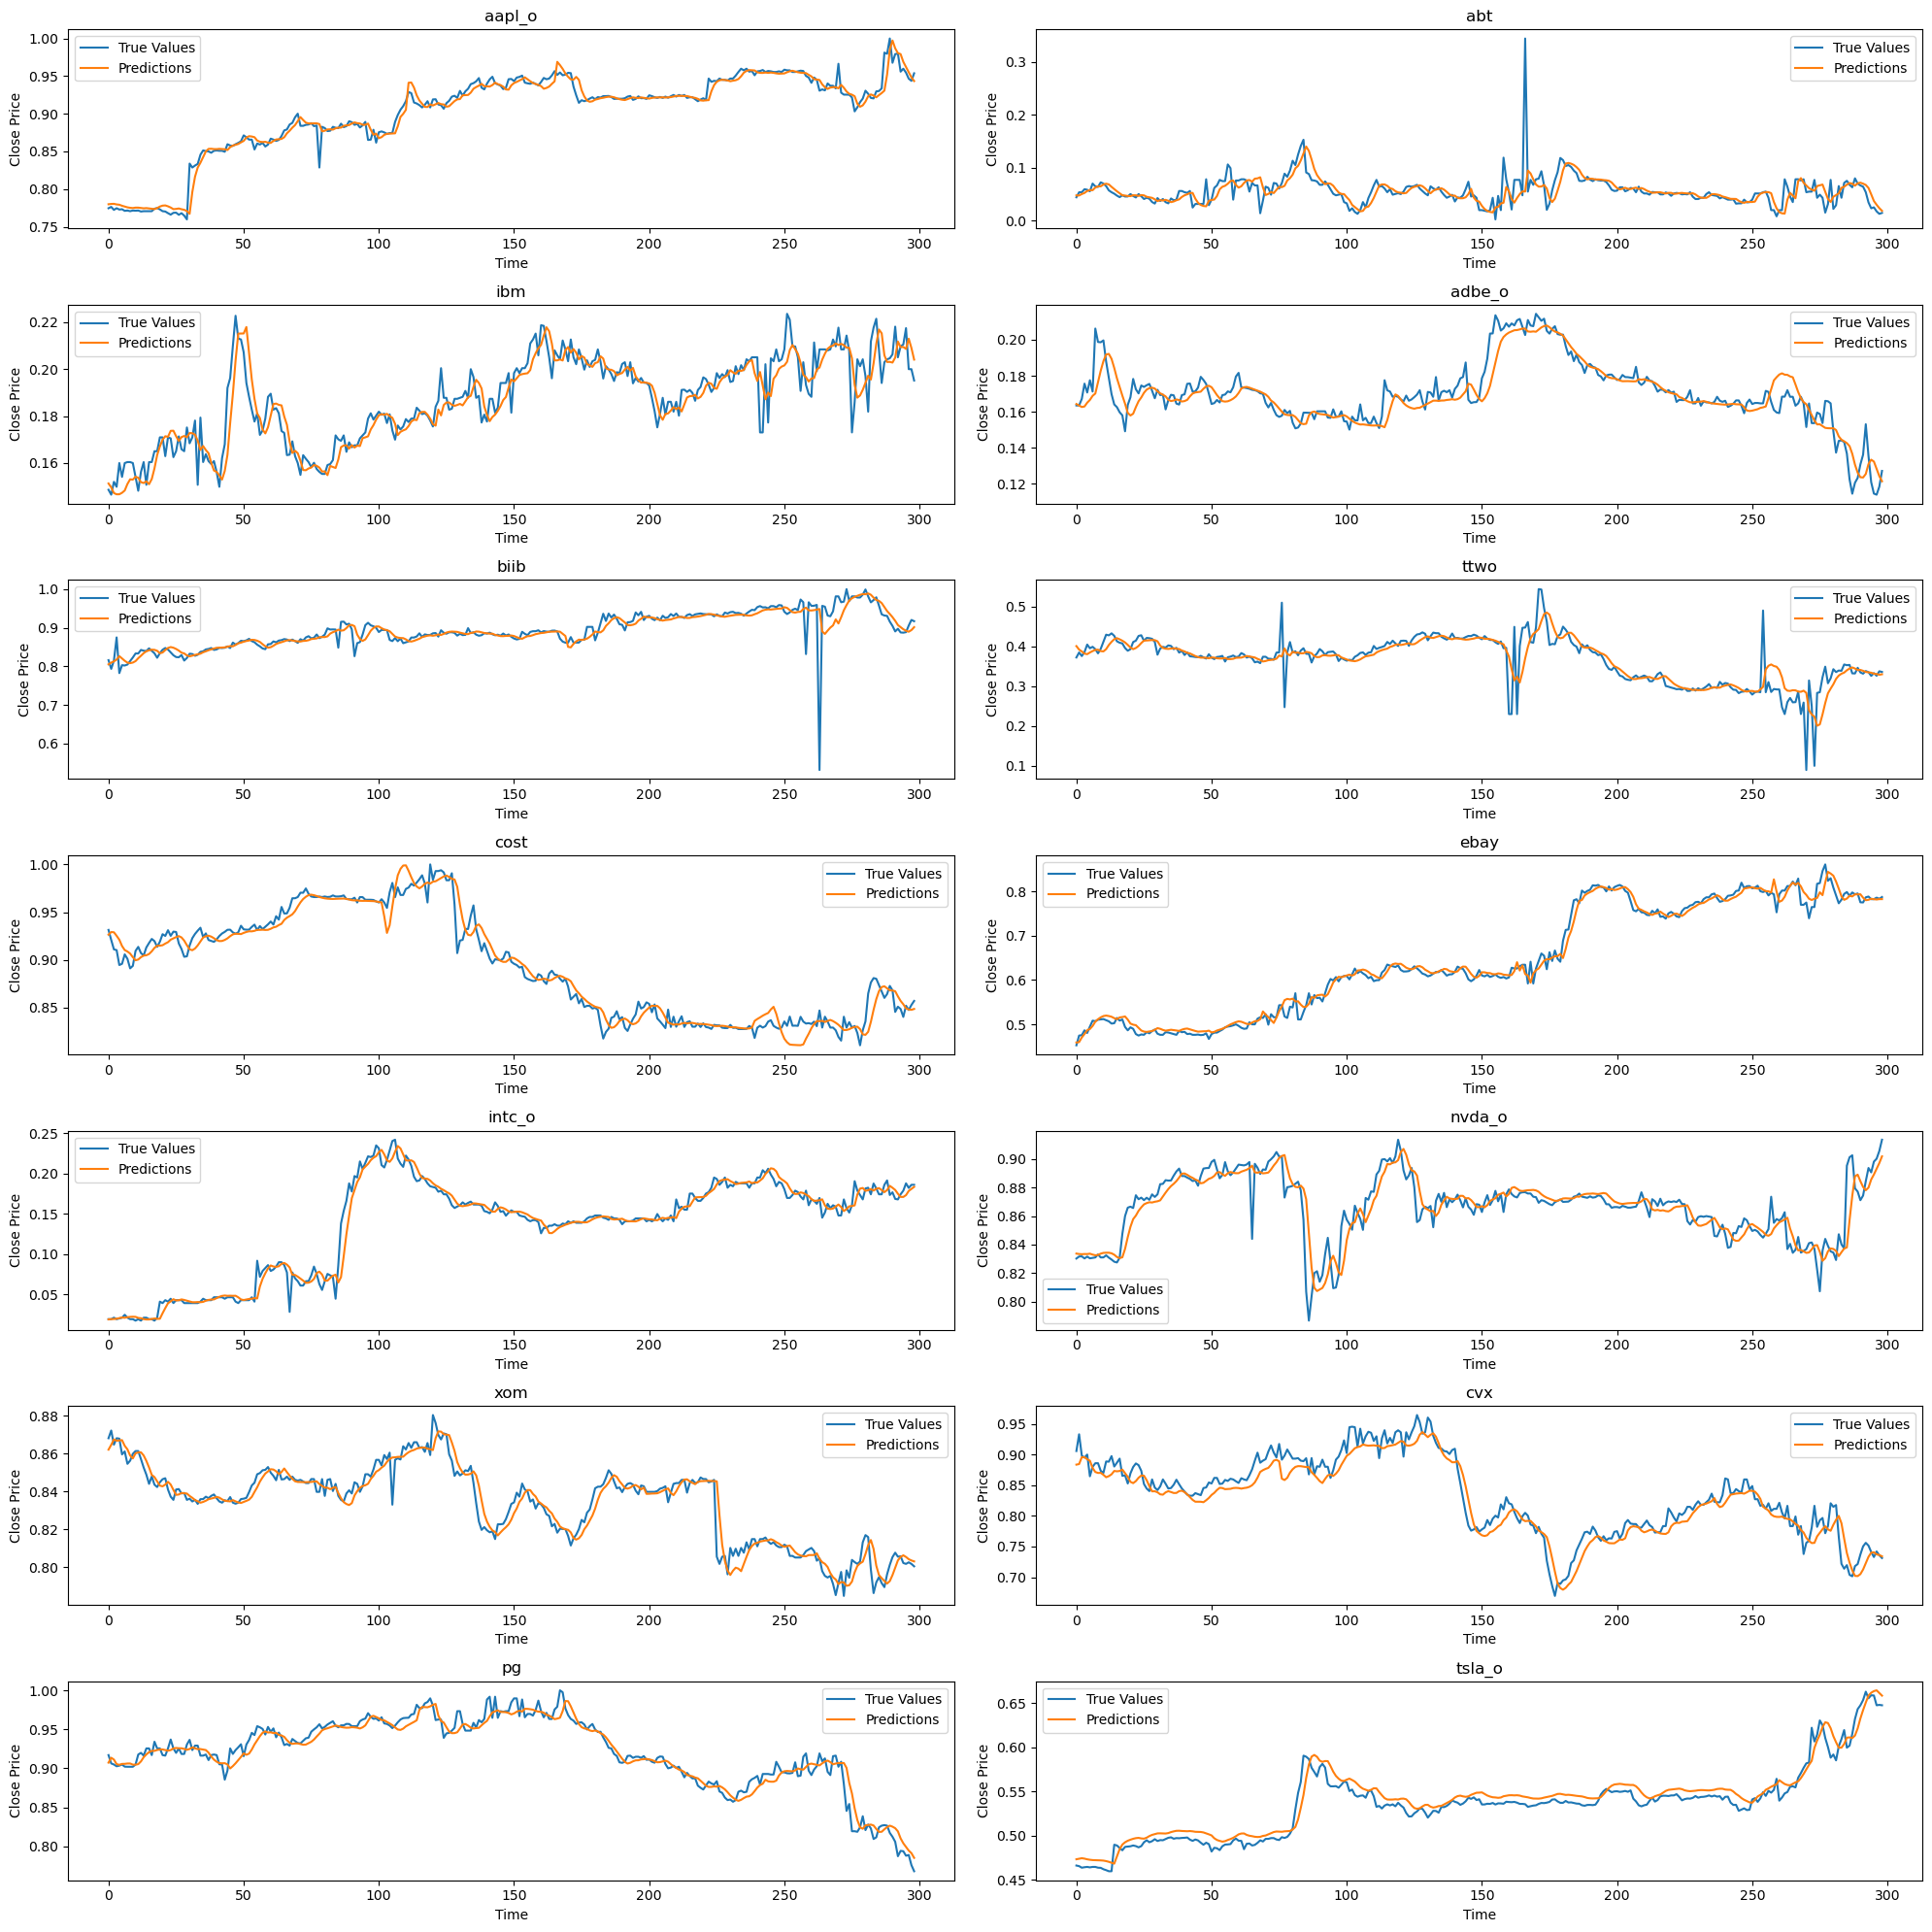

In [597]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import random
import matplotlib.pyplot as plt

# Create the models directory if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Initialize the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Dictionary to store RMSE values for each company
rmse_values = {}

# Dictionaries to store predictions and true values
predictions_dict = {}
true_values_dict = {}

# Define a function to plot true values vs predictions
def plot_predictions(y_test, test_predictions, company_name, ax):
    ax.plot(y_test, label='True Values')
    ax.plot(test_predictions, label='Predictions')
    ax.set_xlabel('Time')
    ax.set_ylabel('Close Price')
    ax.set_title(f'{company_name}')
    ax.legend()

# Ensure the random seed is set before the loop
seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)

for company in companies:
    print(f"Processing company: {company}")

    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    
    # Fetch the train and test data for the current company
    X_train = globals()[f'X_train_{company}']
    y_train = globals()[f'y_train_{company}']
    X_test = globals()[f'X_test_{company}']
    y_test = globals()[f'y_test_{company}']
    
    # Define the architecture of the RNN
    number_of_features = X_train.shape[2]
    model_name = f'rnn_{company}'
    globals()[model_name] = Sequential([
        LSTM(units=200, return_sequences=True, name=f'LSTM_1_{company}', activation='tanh', input_shape=(12, number_of_features)),
        Dropout(0.3),
        LSTM(units=200, name=f'LSTM_2_{company}', activation='tanh'),
        Dropout(0.3),
        Dense(1, name=f'Output_{company}')
    ])
    
    # Compile the model
    optimizer_name = f'optimizer_{company}'
    globals()[optimizer_name] = RMSprop(learning_rate=0.0005, rho=0.9, epsilon=1e-08)
    globals()[model_name].compile(loss='mean_squared_error', optimizer=globals()[optimizer_name])
    
    # Define the model checkpoint callback
    checkpoint_filepath = f'models/model_{company.replace(".", "_").lower()}.keras'
    globals()[f'checkpointer_{company}'] = ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, save_best_only=True, monitor='val_loss')
    
    # Train the model
    globals()[f'lstm_training_{company}'] = globals()[model_name].fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[globals()[f'checkpointer_{company}'], early_stopping],
        verbose=1
    )
    
    # Load the best weights
    globals()[model_name].load_weights(checkpoint_filepath)
    
    # Evaluate the model
    evaluation = globals()[model_name].evaluate(X_test, y_test)
    print(f'Final model evaluation for {company}: {evaluation}')
    
    # Store RMSE values
    loss_history = pd.DataFrame(globals()[f'lstm_training_{company}'].history).pow(.5)
    rmse_values[company] = loss_history

    # Make predictions
    test_predict_scaled = globals()[model_name].predict(X_test)
    
    # Store predictions and true values in dictionaries
    predictions_dict[company] = test_predict_scaled.squeeze()
    true_values_dict[company] = y_test.squeeze()



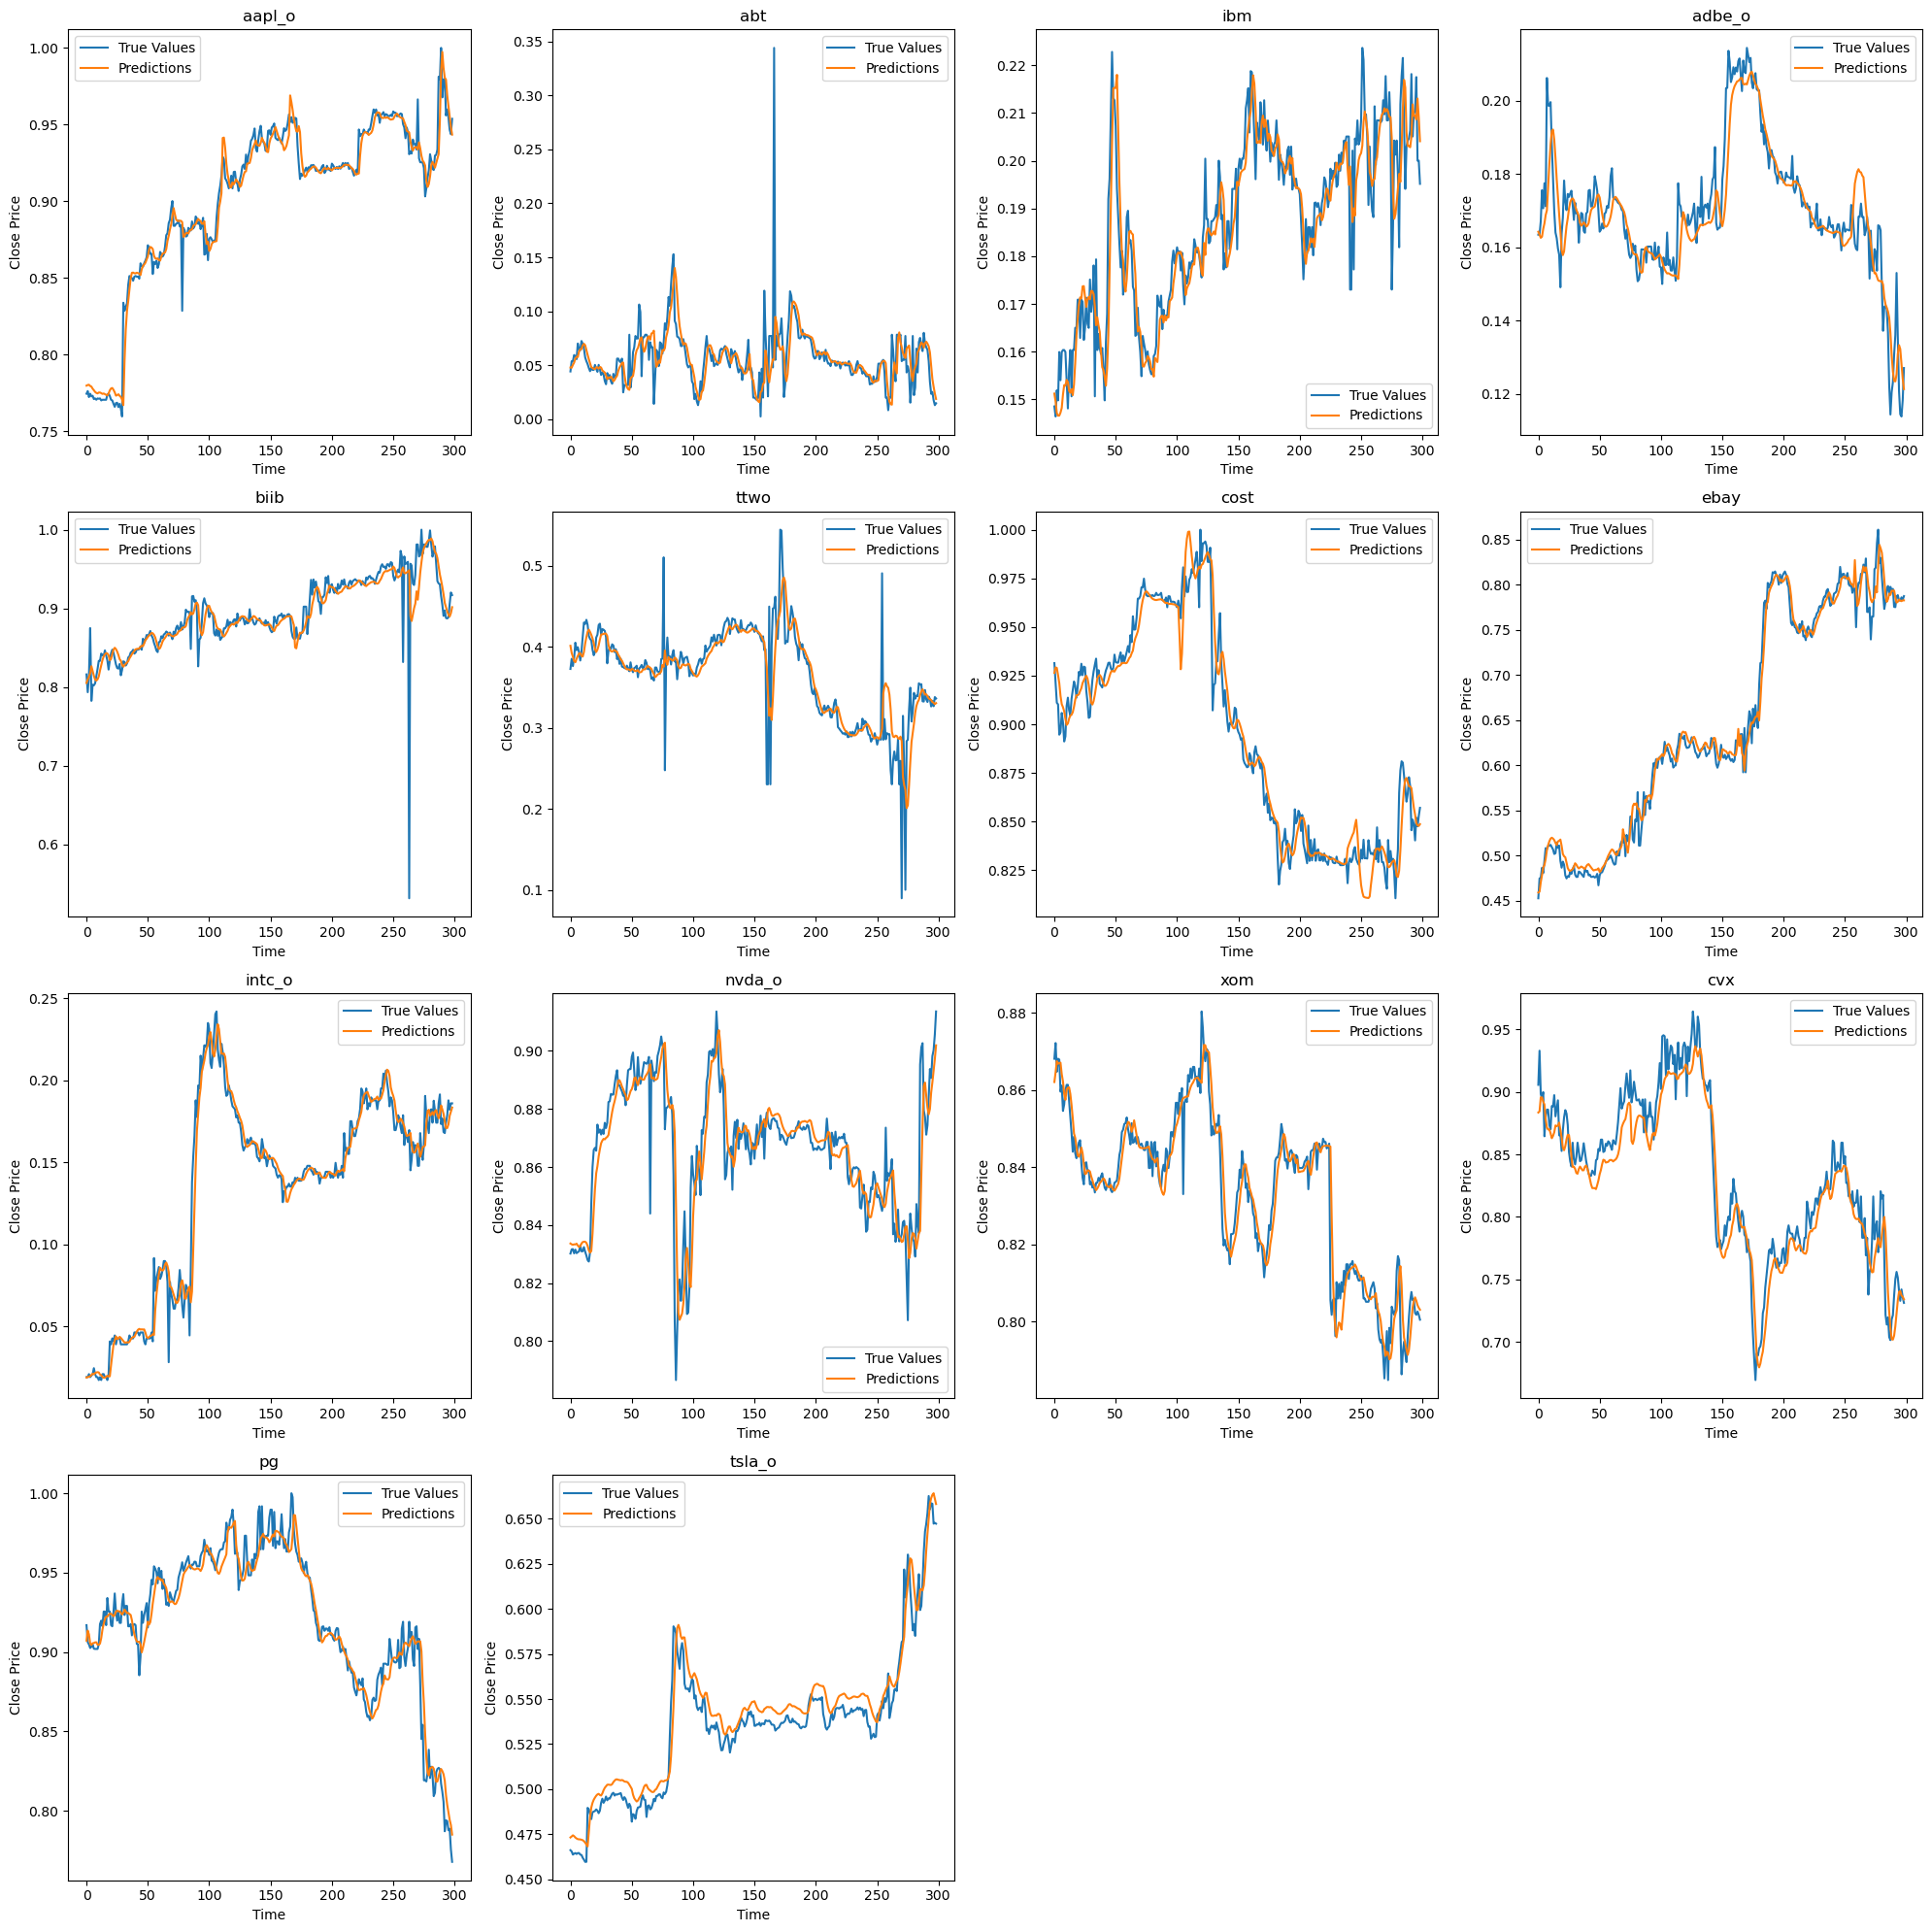

In [617]:
# Plot all predictions in a matrix form
companies4 = [[]]

num_companies = len(companies)
num_cols = 2
num_rows = (num_companies + 1) // num_cols

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axs = axs.flatten()

for i, company in enumerate(companies):
    plot_predictions(true_values_dict[company], predictions_dict[company], company, axs[i])

# Hide any unused subplots
for i in range(len(companies), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

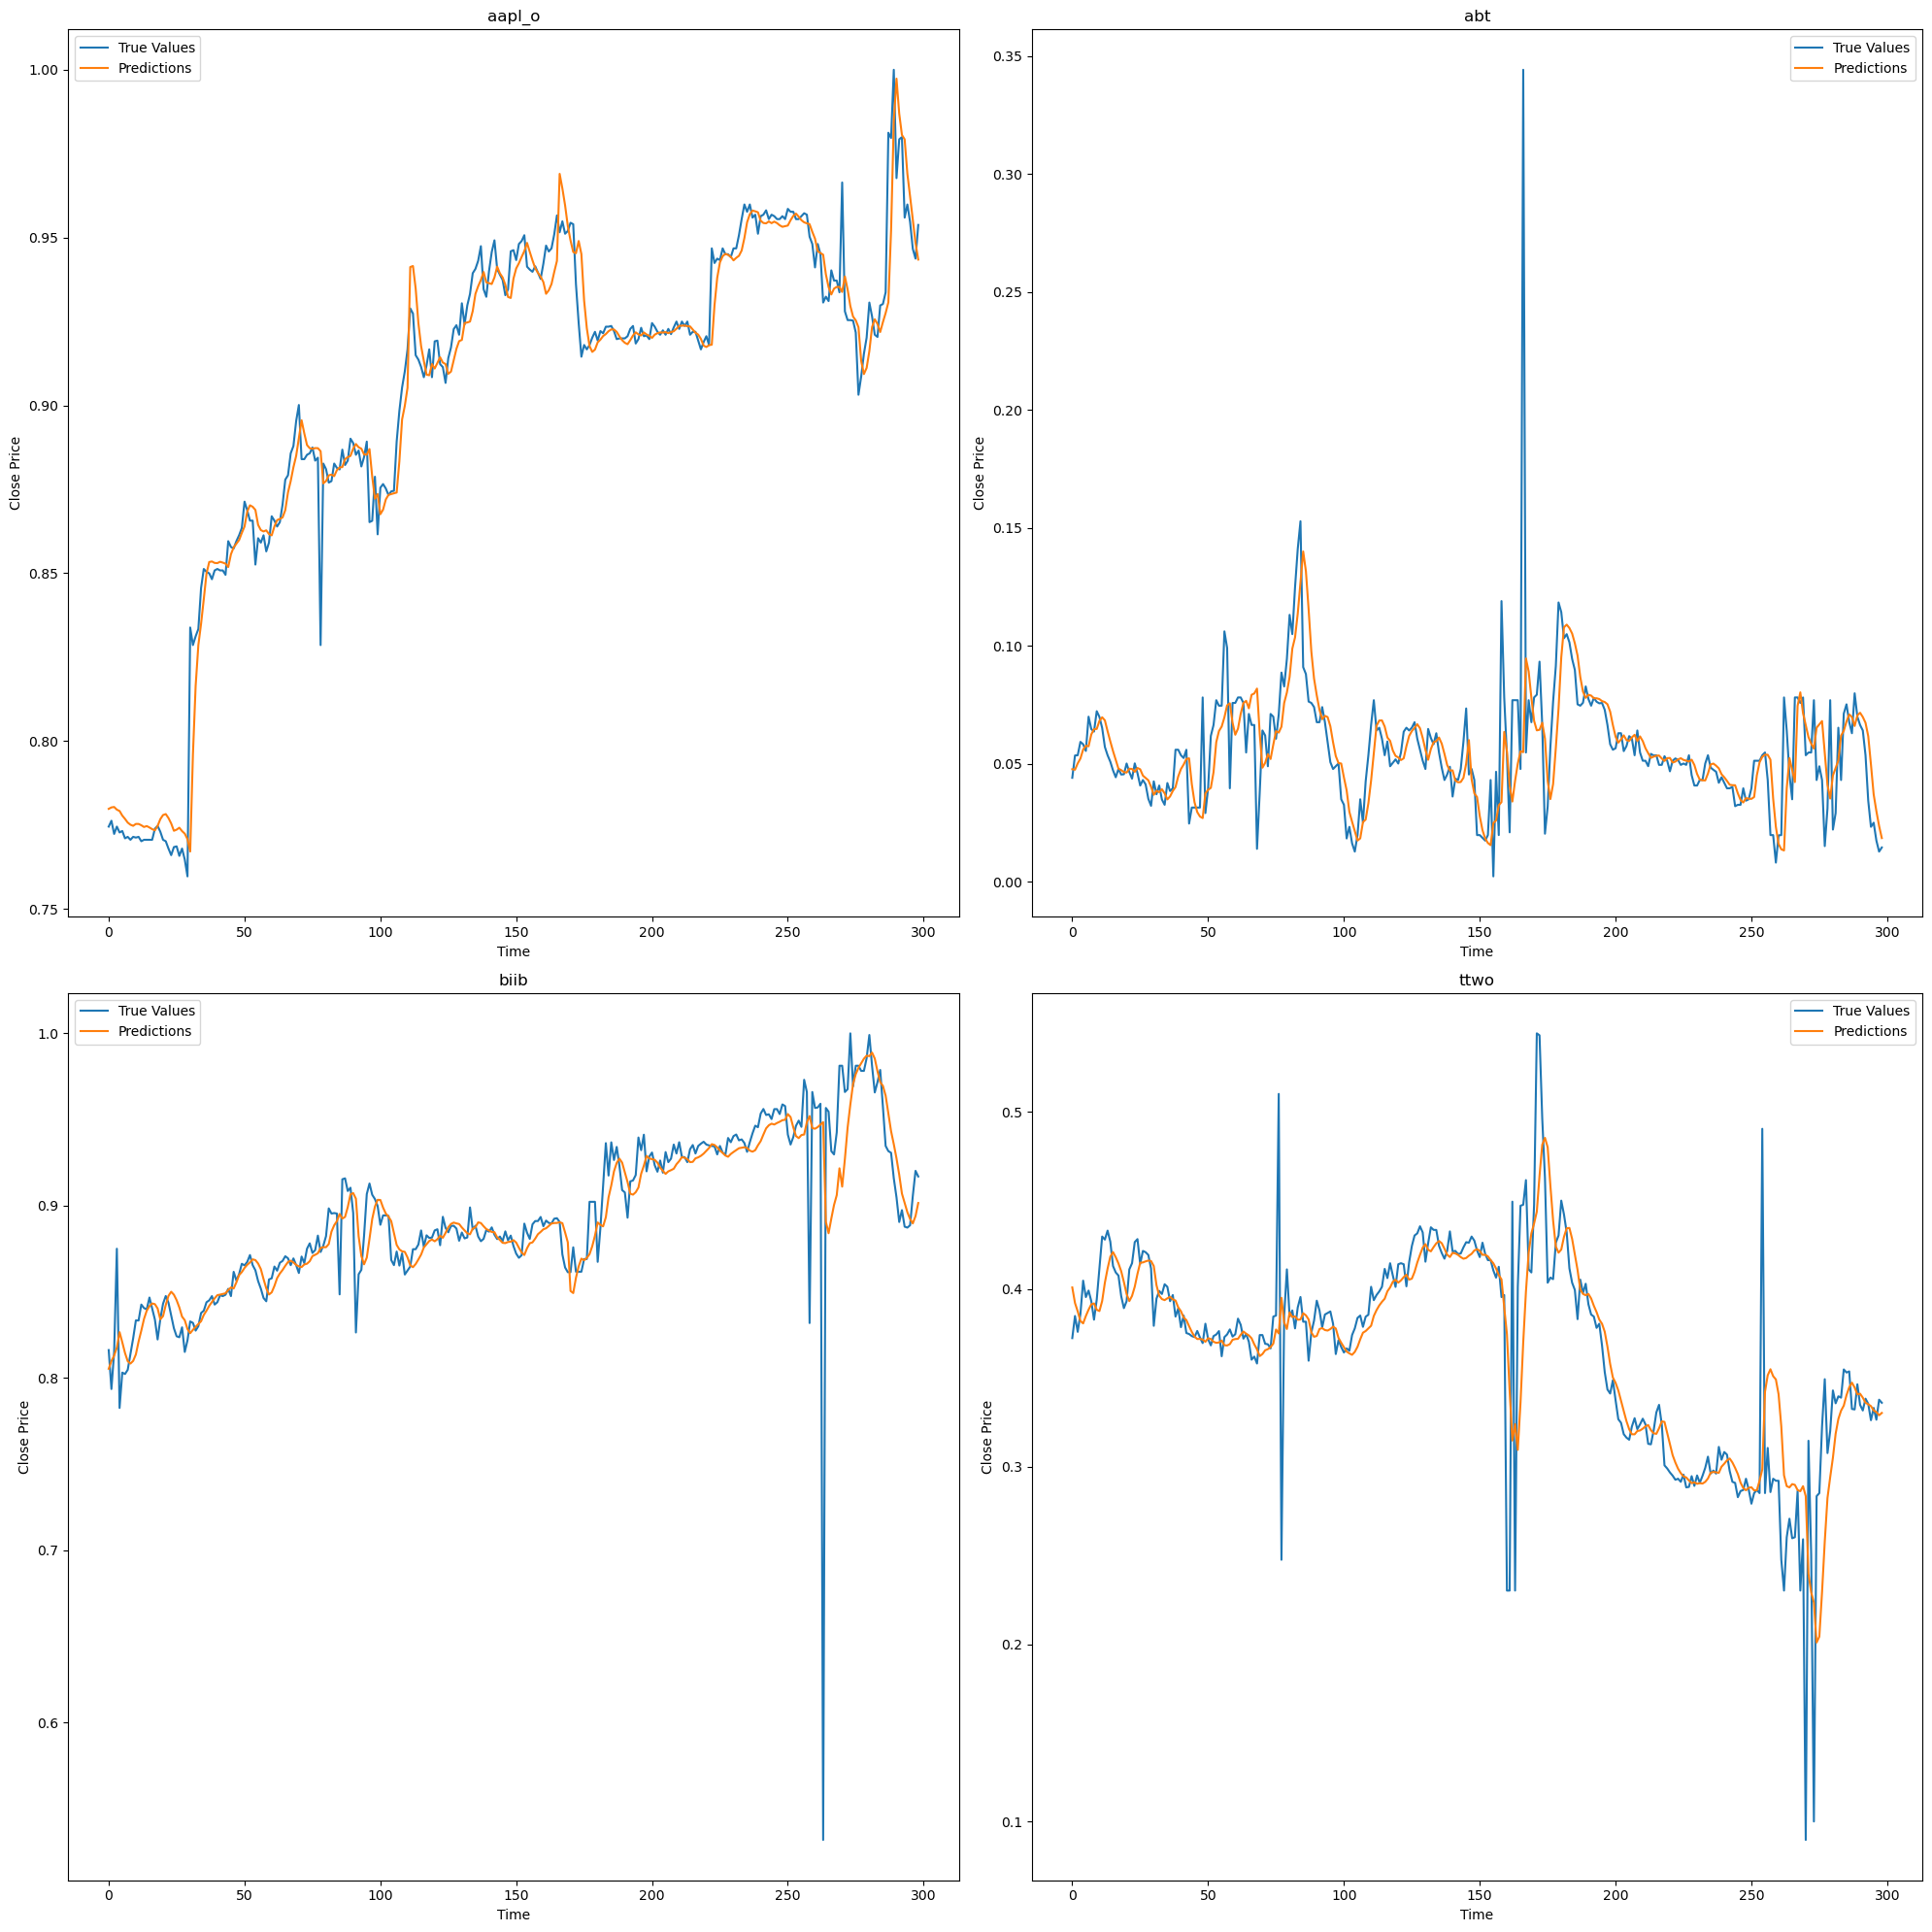

In [621]:

# Define the specific companies you want to plot
companies4 = ['aapl_o', 'abt', 'biib', 'ttwo']

# Define the number of rows and columns for the subplots
num_cols = 2
num_rows = (len(companies4) + 1) // num_cols

# Create the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
axs = axs.flatten()

# Plot predictions for the specified companies
for i, company in enumerate(companies4):
    plot_predictions(true_values_dict[company], predictions_dict[company], company, axs[i])

# Hide any unused subplots
for i in range(len(companies4), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('4_predictions', dpi = 200)


### RMSE plotting of all companies LSTM

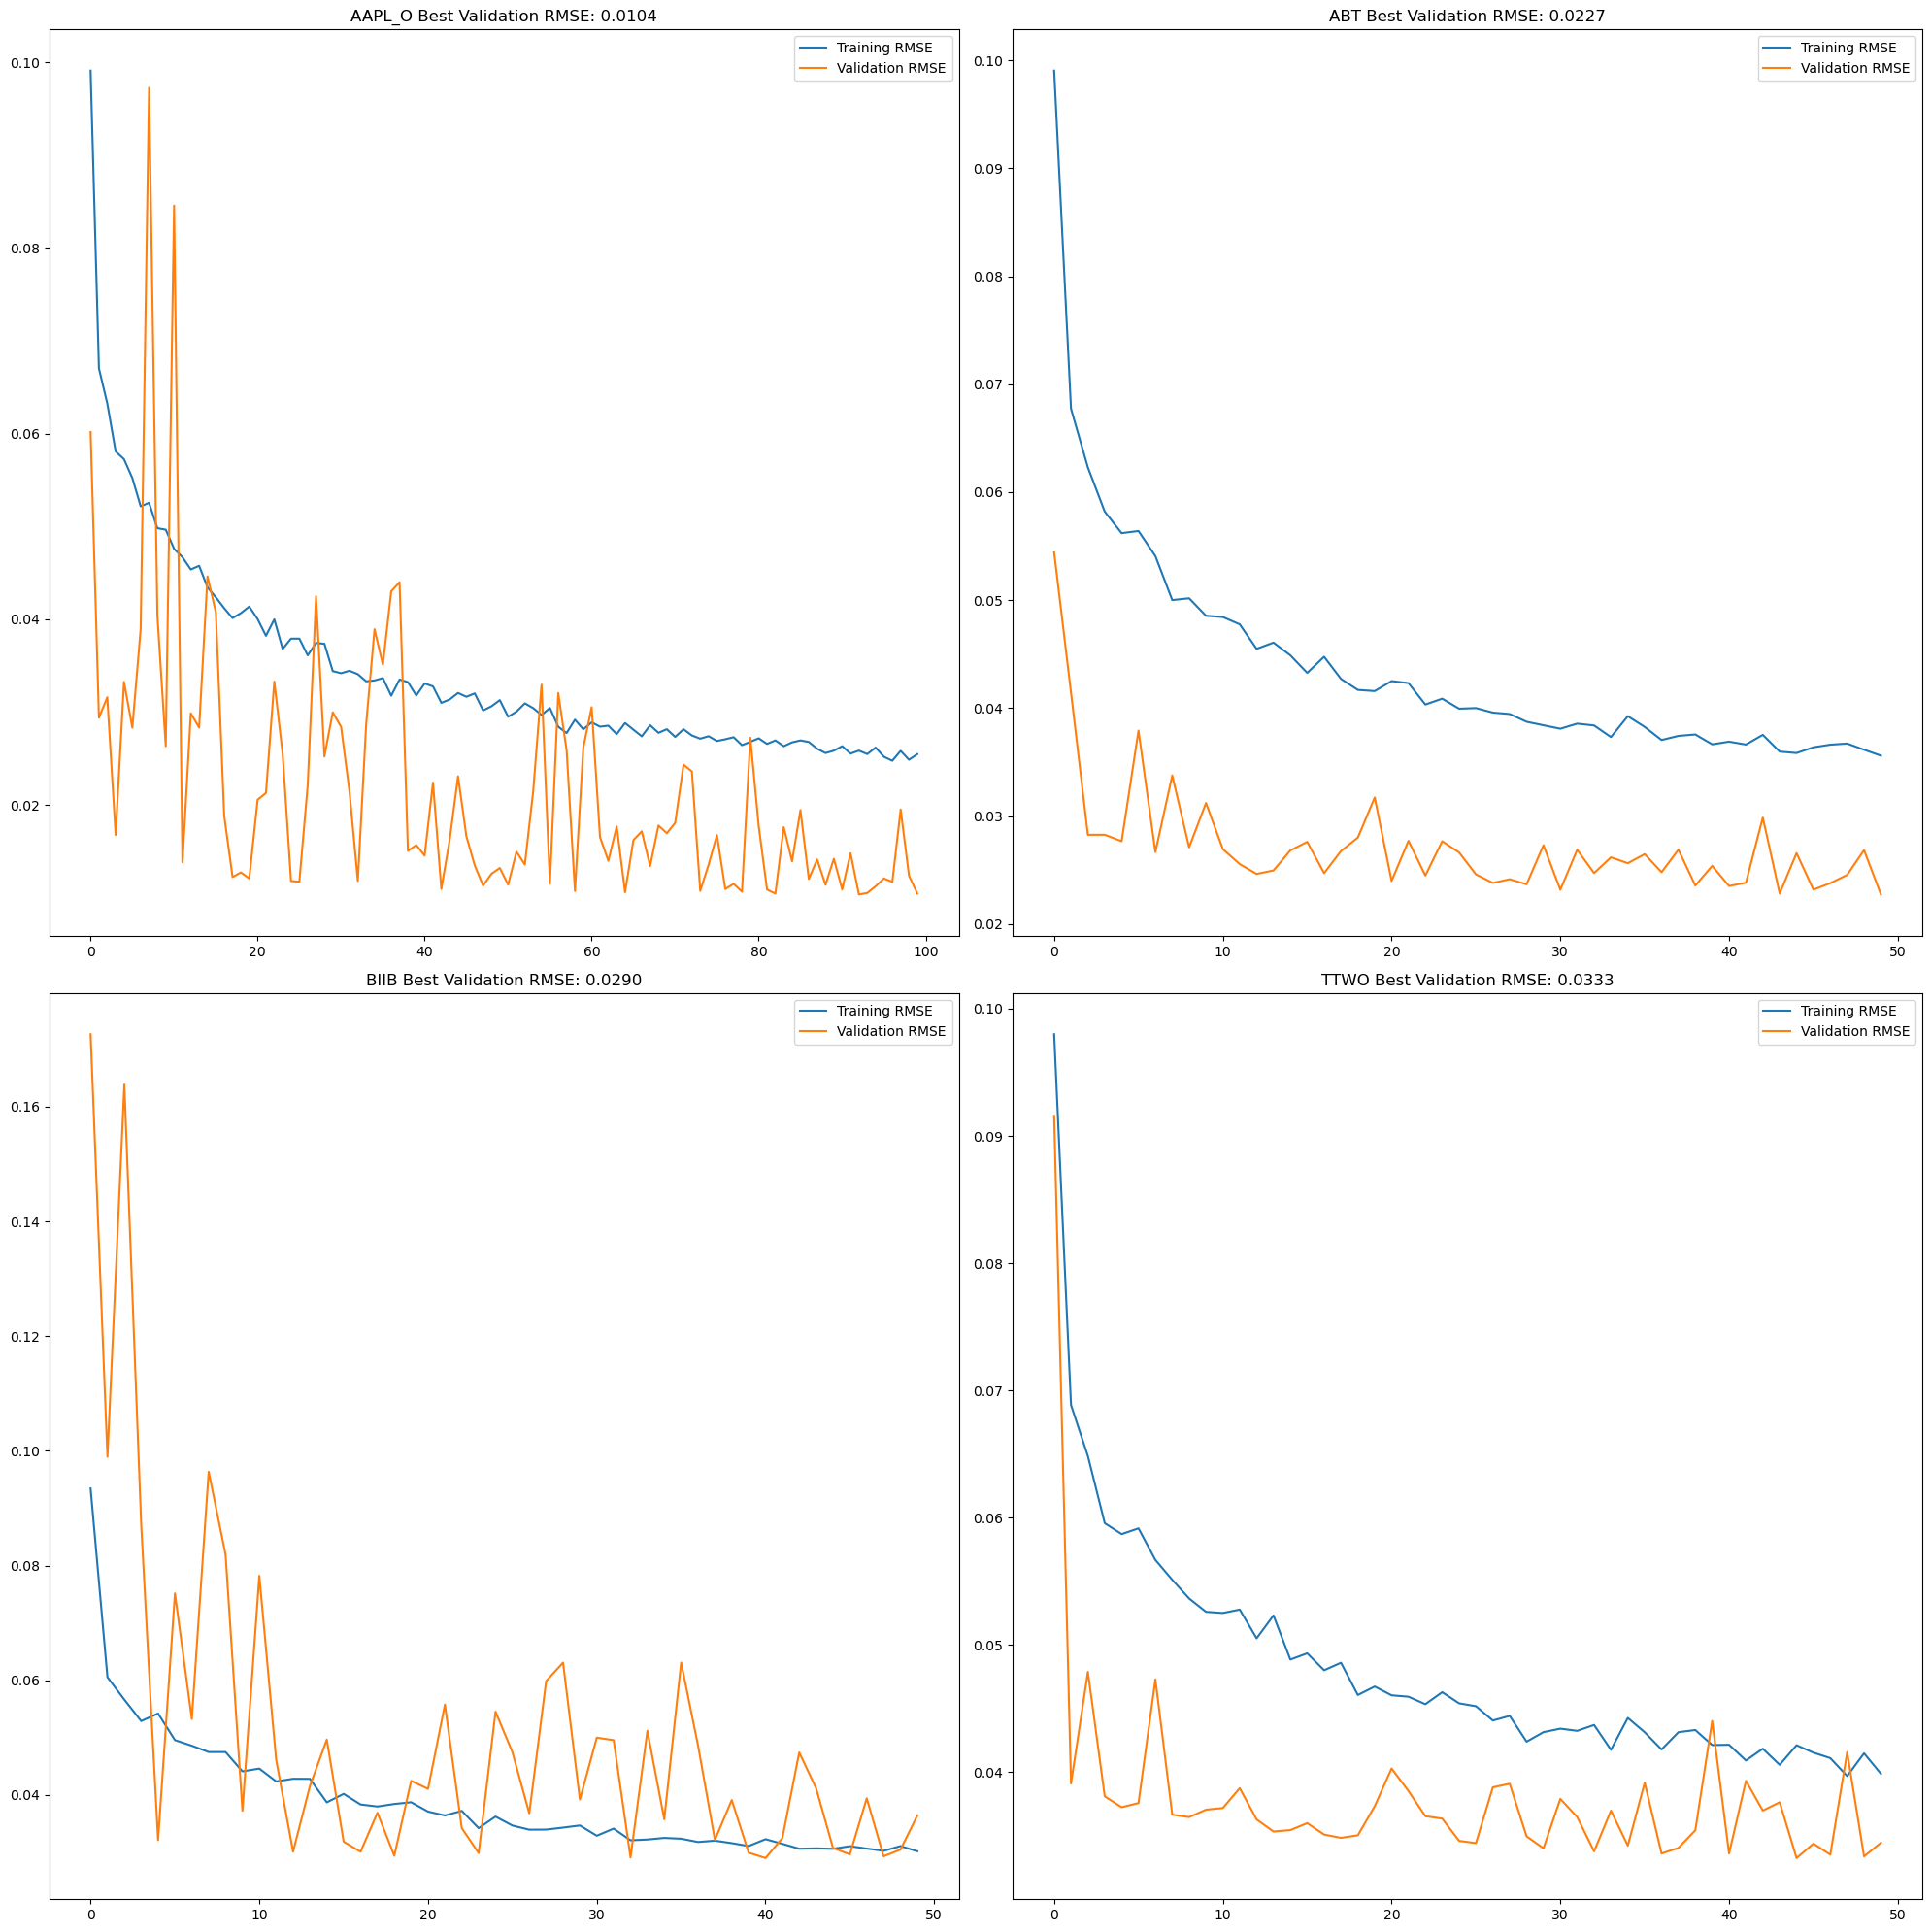

In [622]:
# Create the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs = axs.flatten()

# Plot RMSE for the specified companies
for i, company in enumerate(companies4):
    history = rmse_values[company]
    history.columns = ['Training RMSE', 'Validation RMSE']
    axs[i].plot(history['Training RMSE'], label='Training RMSE')
    axs[i].plot(history['Validation RMSE'], label='Validation RMSE')
    best_rmse = history['Validation RMSE'].min()
    axs[i].set_title(f'{company.upper()} Best Validation RMSE: {best_rmse:.4f}')
    axs[i].legend()

# Hide any unused subplots
for i in range(len(companies4), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('4_RMSE_Companies', dpi=200)
plt.show()


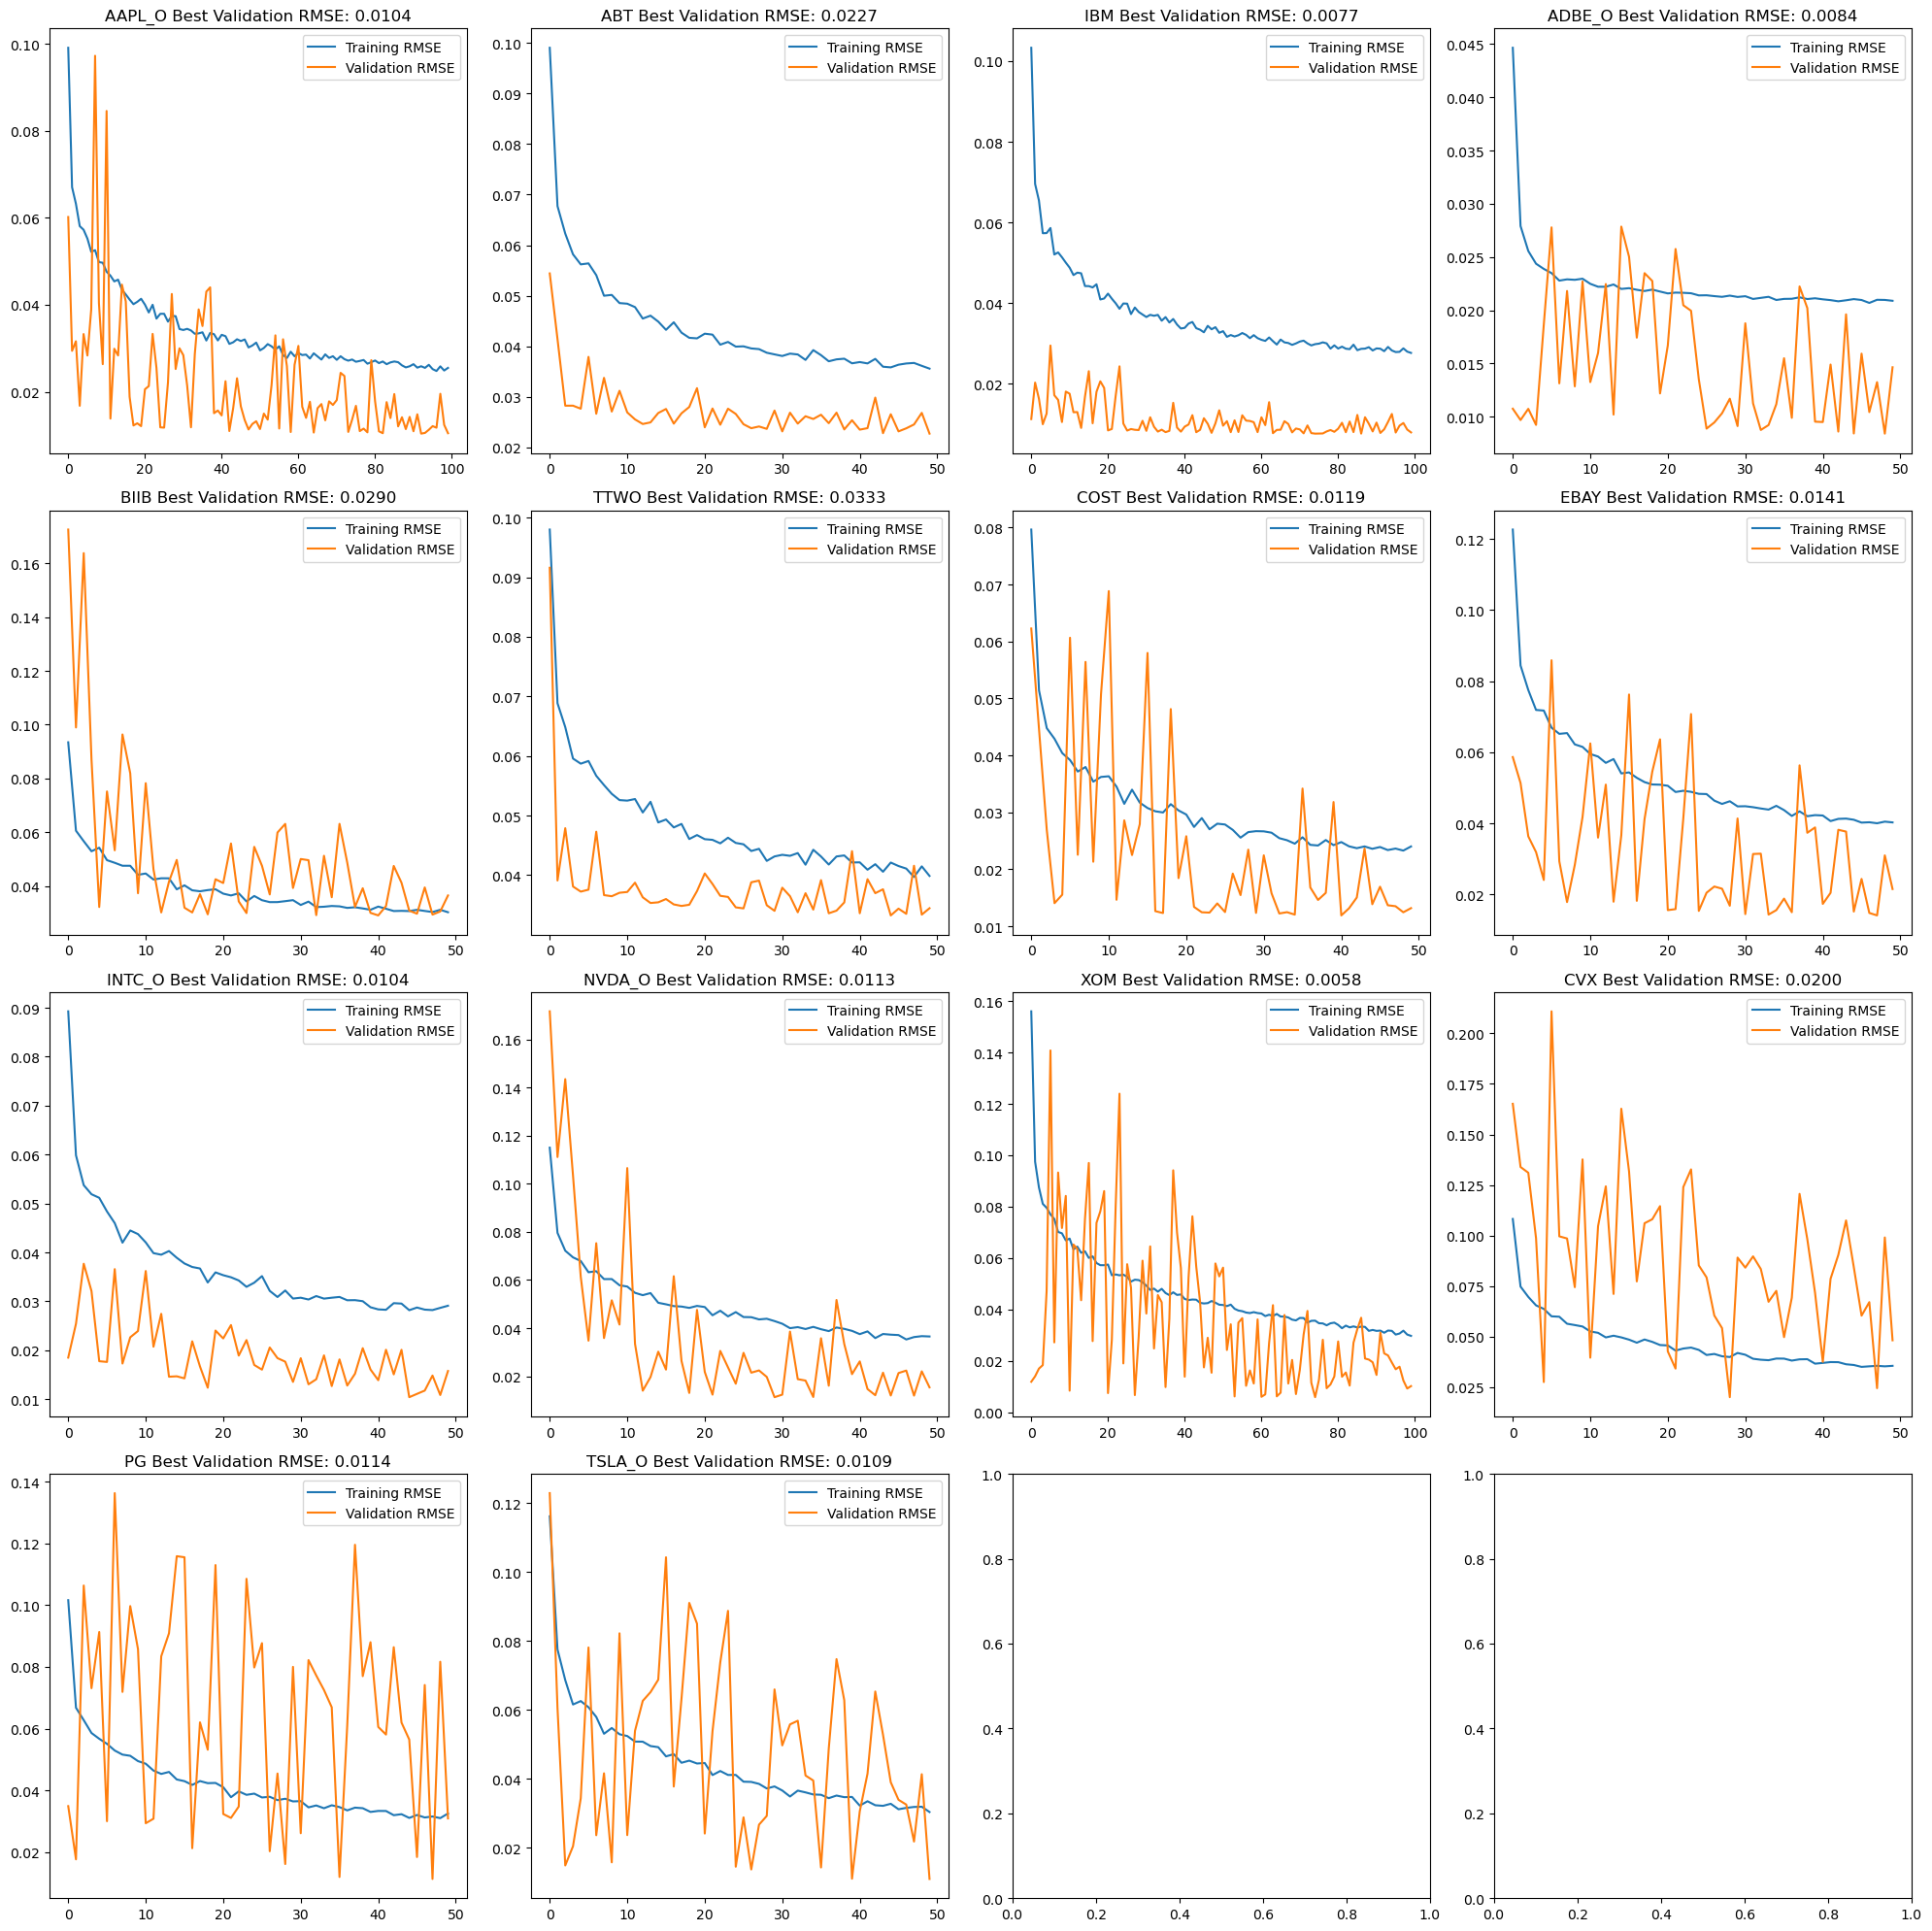

In [615]:
import matplotlib.pyplot as plt

# Plot RMSE over epochs for all companies
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for ax, (company, history) in zip(axs.flatten(), rmse_values.items()):
    history.columns = ['Training RMSE', 'Validation RMSE']
    ax.plot(history['Training RMSE'], label='Training RMSE')
    ax.plot(history['Validation RMSE'], label='Validation RMSE')
    best_rmse = history['Validation RMSE'].min()
    ax.set_title(f'{company.upper()} Best Validation RMSE: {best_rmse:.4f}')
    ax.legend()

plt.tight_layout()
plt.savefig('RMSE_Companies', dpi=200)

# Using the models saved to generate dataframes (did not really used them but can serve as reference)

In [594]:
import tensorflow as tf
import os

# Directory containing the model files
models_dir = '/Users/shpetimtafili/Desktop/Advanced Data Analysis/Project ADA/models'

# List of model files
model_files = [
    'model_aapl_o.keras',
    'model_abt.keras',
    'model_adbe_o.keras',
    'model_biib.keras',
    'model_cost.keras',
    'model_cvx.keras',
    'model_ebay.keras',
    'model_ibm.keras',
    'model_intc_o.keras',
    'model_nvda_o.keras',
    'model_pg.keras',
    'model_tsla_o.keras',
    'model_ttwo.keras',
    'model_xom.keras'
]

# Dictionary to store the loaded models
models = {}

# Load each model and store it in the dictionary
for model_file in model_files:
    model_path = os.path.join(models_dir, model_file)
    model_name = os.path.splitext(model_file)[0]  # Extract the model name without extension
    models[model_name] = tf.keras.models.load_model(model_path)

# Example usage: print the summary of each loaded model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    model.summary()
    print("\n")


Model: model_aapl_o


Model: "sequential_289"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_aapl_o (LSTM)            │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_514 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_aapl_o (LSTM)            │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_515 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_aapl_o (Dense)           │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_abt


Model: "sequential_290"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_abt (LSTM)               │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_516 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_abt (LSTM)               │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_517 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_abt (Dense)              │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_adbe_o


Model: "sequential_292"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_adbe_o (LSTM)            │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_520 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_adbe_o (LSTM)            │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_521 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_adbe_o (Dense)           │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_biib


Model: "sequential_293"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_biib (LSTM)              │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_522 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_biib (LSTM)              │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_523 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_biib (Dense)             │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_cost


Model: "sequential_295"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_cost (LSTM)              │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_526 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_cost (LSTM)              │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_527 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_cost (Dense)             │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_cvx


Model: "sequential_300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_cvx (LSTM)               │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_536 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_cvx (LSTM)               │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_537 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_cvx (Dense)              │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_ebay


Model: "sequential_296"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_ebay (LSTM)              │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_528 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_ebay (LSTM)              │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_529 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_ebay (Dense)             │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_ibm


Model: "sequential_291"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_ibm (LSTM)               │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_518 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_ibm (LSTM)               │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_519 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_ibm (Dense)              │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_intc_o


Model: "sequential_297"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_intc_o (LSTM)            │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_530 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_intc_o (LSTM)            │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_531 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_intc_o (Dense)           │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_nvda_o


Model: "sequential_298"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_nvda_o (LSTM)            │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_532 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_nvda_o (LSTM)            │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_533 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_nvda_o (Dense)           │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_pg


Model: "sequential_301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_pg (LSTM)                │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_538 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_pg (LSTM)                │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_539 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_pg (Dense)               │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_tsla_o


Model: "sequential_302"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_tsla_o (LSTM)            │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_540 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_tsla_o (LSTM)            │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_541 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_tsla_o (Dense)           │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_ttwo


Model: "sequential_294"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_ttwo (LSTM)              │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_524 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_ttwo (LSTM)              │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_525 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_ttwo (Dense)             │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)



Model: model_xom


Model: "sequential_299"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1_xom (LSTM)               │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_534 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2_xom (LSTM)               │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_535 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_xom (Dense)              │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,604 (3.71 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,803 (1.85 MB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


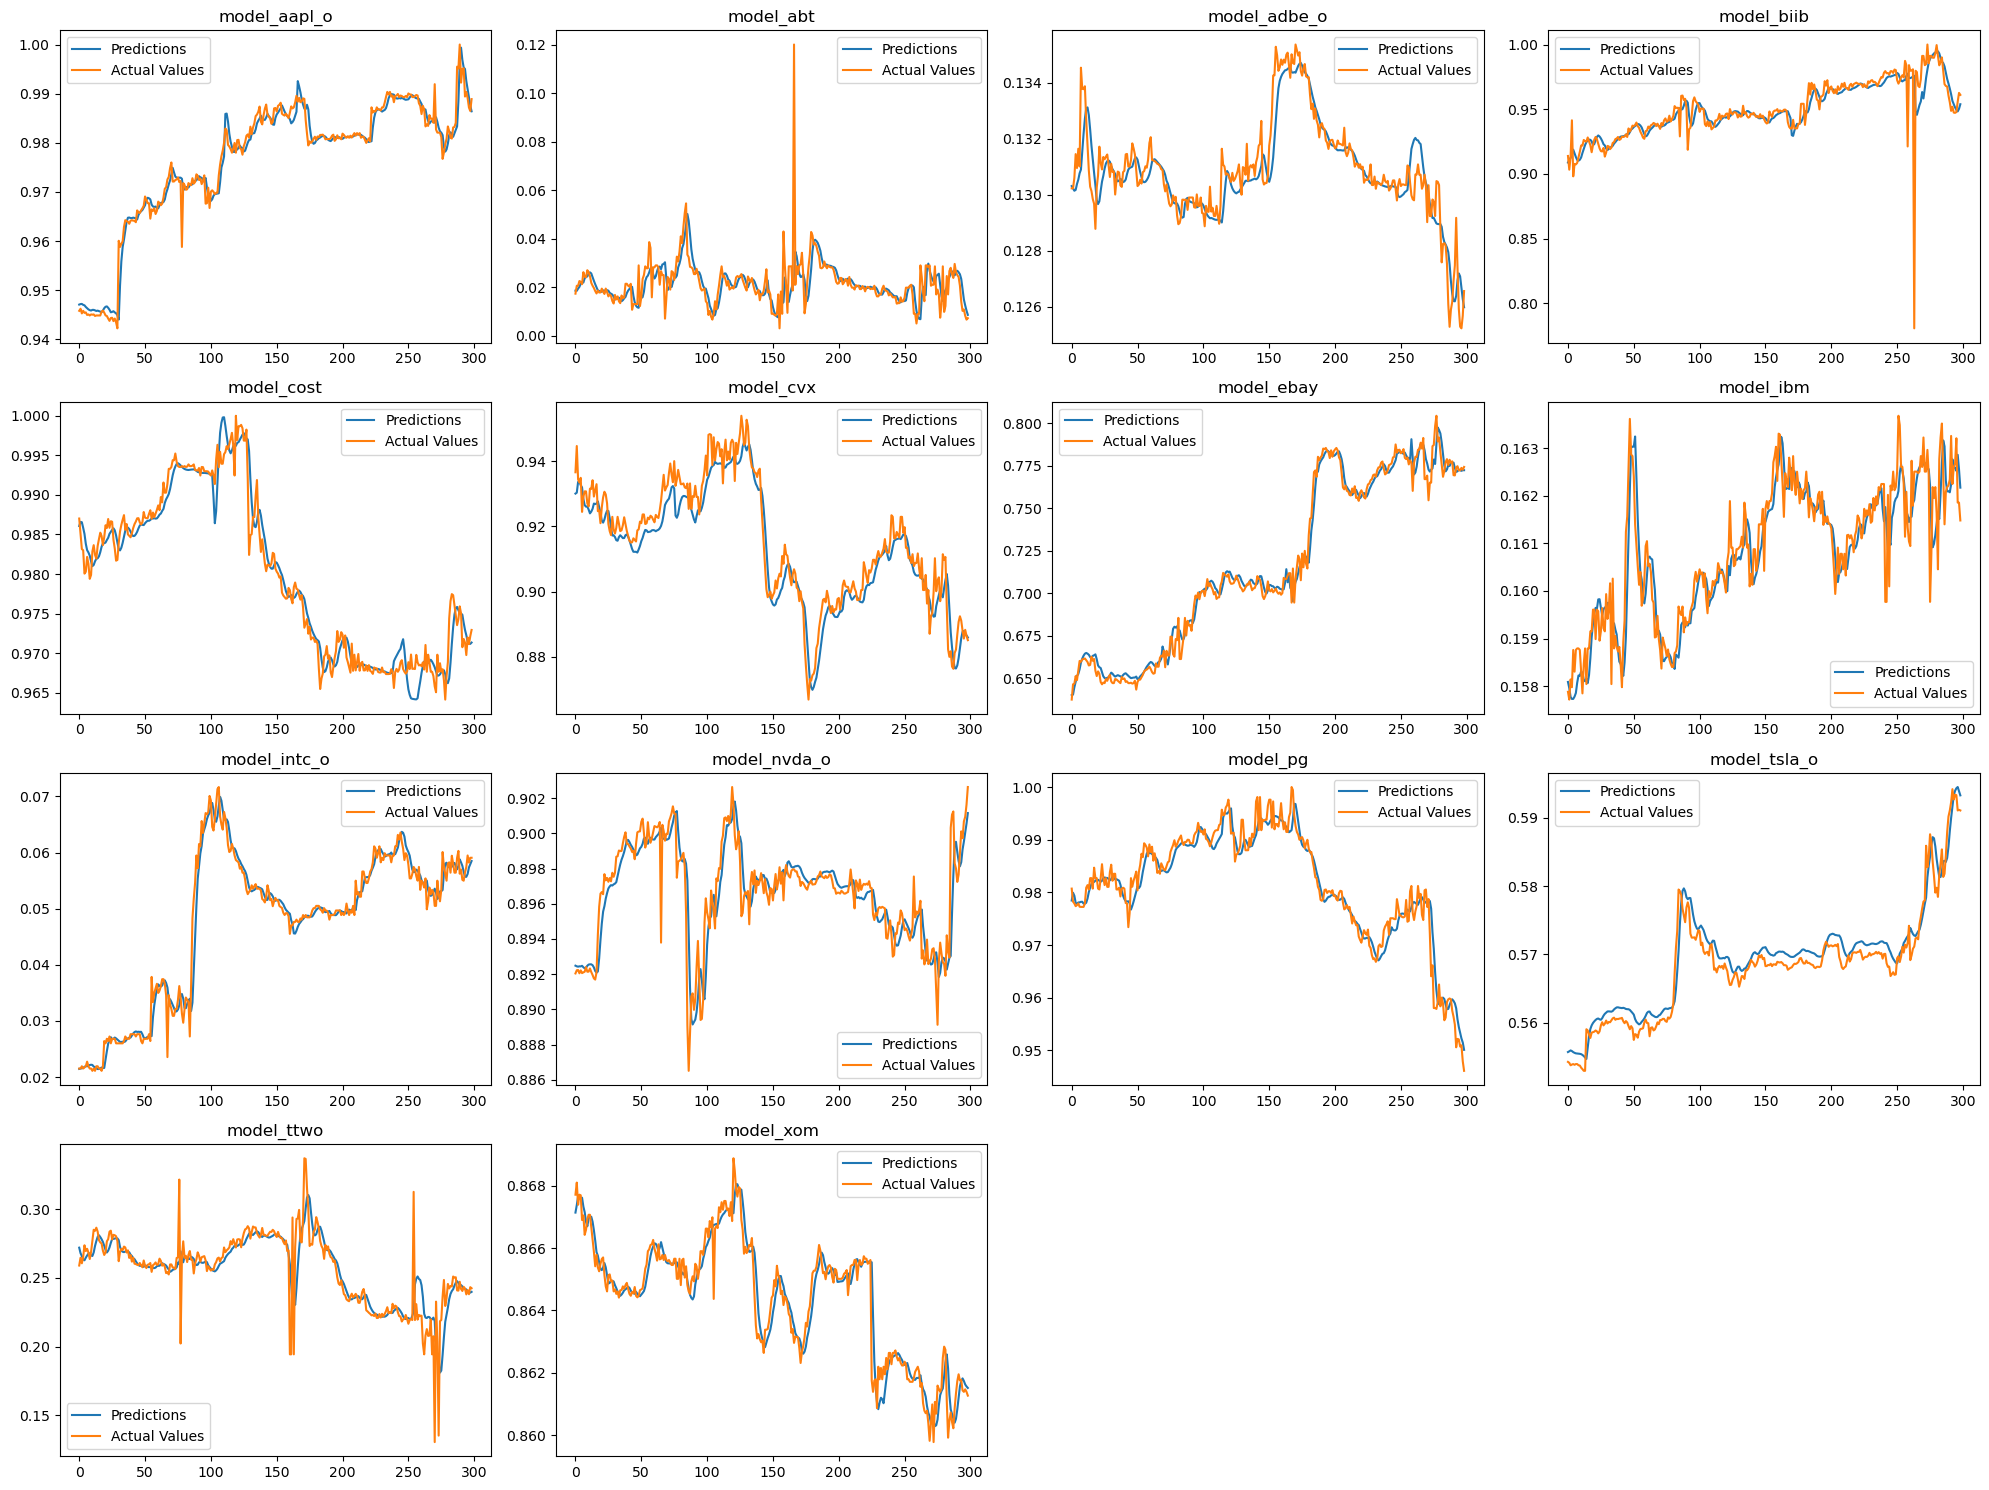

In [596]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Map model names to their corresponding test datasets and actual values
test_data_mapping = {
    'model_aapl_o': (X_test_aapl_o, y_test_aapl_o),
    'model_abt': (X_test_abt, y_test_abt),
    'model_adbe_o': (X_test_adbe_o, y_test_adbe_o),
    'model_biib': (X_test_biib, y_test_biib),
    'model_cost': (X_test_cost, y_test_cost),
    'model_cvx': (X_test_cvx, y_test_cvx),
    'model_ebay': (X_test_ebay, y_test_ebay),
    'model_ibm': (X_test_ibm, y_test_ibm),
    'model_intc_o': (X_test_intc_o, y_test_intc_o),
    'model_nvda_o': (X_test_nvda_o, y_test_nvda_o),
    'model_pg': (X_test_pg, y_test_pg),
    'model_tsla_o': (X_test_tsla_o, y_test_tsla_o),
    'model_ttwo': (X_test_ttwo, y_test_ttwo),
    'model_xom': (X_test_xom, y_test_xom)
}

# Determine the grid size for subplots
num_models = len(model_files)
cols = 4  # Number of columns in the plot grid
rows = num_models // cols + (num_models % cols > 0)  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, model_file in enumerate(model_files):
    model_name = os.path.splitext(model_file)[0]
    model_path = os.path.join(models_dir, model_file)
    model = tf.keras.models.load_model(model_path)
    
    # Get the test data and actual values for the current model
    X_test, y_test = test_data_mapping[model_name]
    
    # Reshape y_test for inverse transformation
    y_test_reshaped = y_test.reshape(-1, 1)
    
    # Fit the scaler on the y_test data (or you can fit it on the whole training data during preprocessing)
    scaler.fit(y_test_reshaped)
    
    # Inverse transform y_test to its original scale
    y_test_rescaled = scaler.inverse_transform(y_test_reshaped).squeeze()
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Inverse transform the predictions
    predictions_rescaled = scaler.inverse_transform(predictions).squeeze()
    
    # Convert the rescaled y_test and predictions to Pandas Series for easy comparison
    y_test_series = pd.Series(y_test_rescaled, index=range(len(y_test)))
    predictions_series = pd.Series(predictions_rescaled, index=range(len(predictions)))
    
    # Plot the predictions and actual values
    ax = axes[i]
    ax.plot(predictions_series, label='Predictions')
    ax.plot(y_test_series, label='Actual Values')
    ax.set_title(model_name)
    ax.legend()

# Remove any empty subplots
for j in range(len(model_files), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Some metrics on apple and other companies




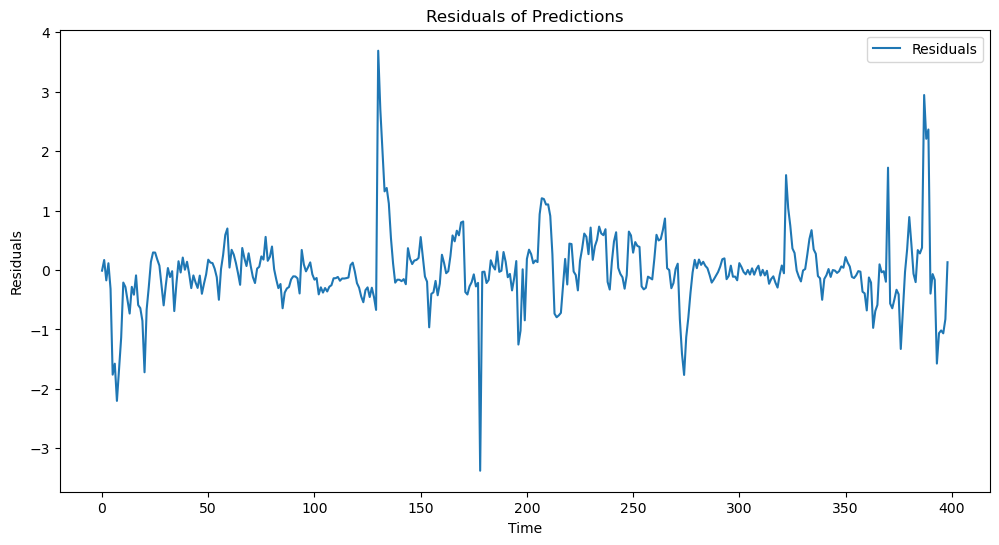

In [362]:
# RESIDUAL PLOT: difference between the true values and the predicted values to visualize the errors
residuals = y_rescaled_series - test_predict_series

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()

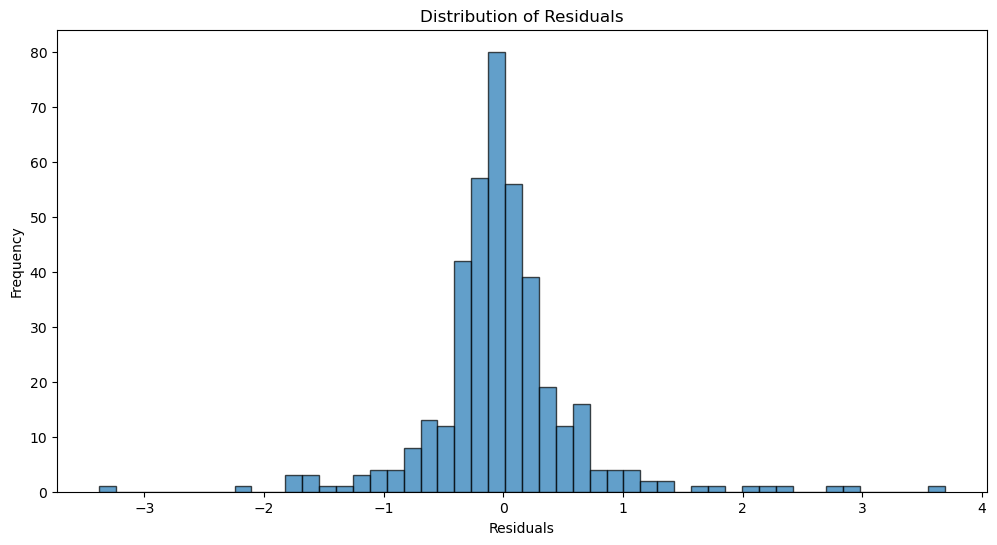

In [363]:
# ERROR Distribution: distribution of prediction errors to understand the spread and bias in my model’s predictions.

plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


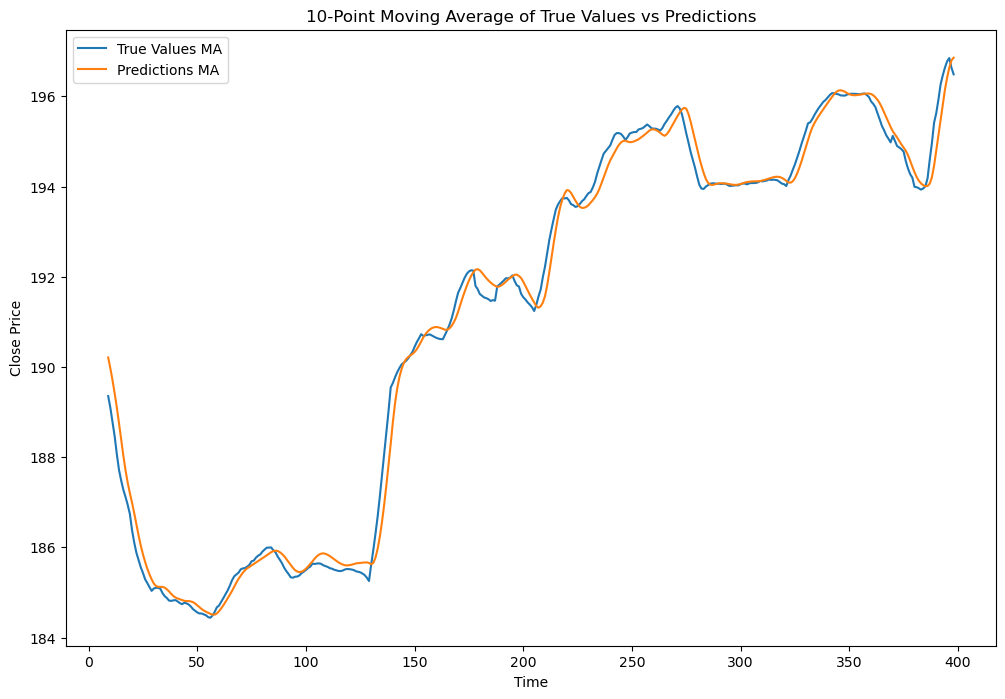

In [364]:
# MOVING AVERAGE COMPARISON: moving average of the true and predicted values to smooth out short-term fluctuations and highlight longer-term trends.
# Calculate moving averages
window_size = 10
y_rescaled_ma = y_rescaled_series.rolling(window=window_size).mean()
test_predict_ma = test_predict_series.rolling(window=window_size).mean()

# Plot moving averages
plt.figure(figsize=(12, 8))
plt.plot(y_rescaled_ma, label='True Values MA')
plt.plot(test_predict_ma, label='Predictions MA')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title(f'{window_size}-Point Moving Average of True Values vs Predictions')
plt.legend()
plt.show()


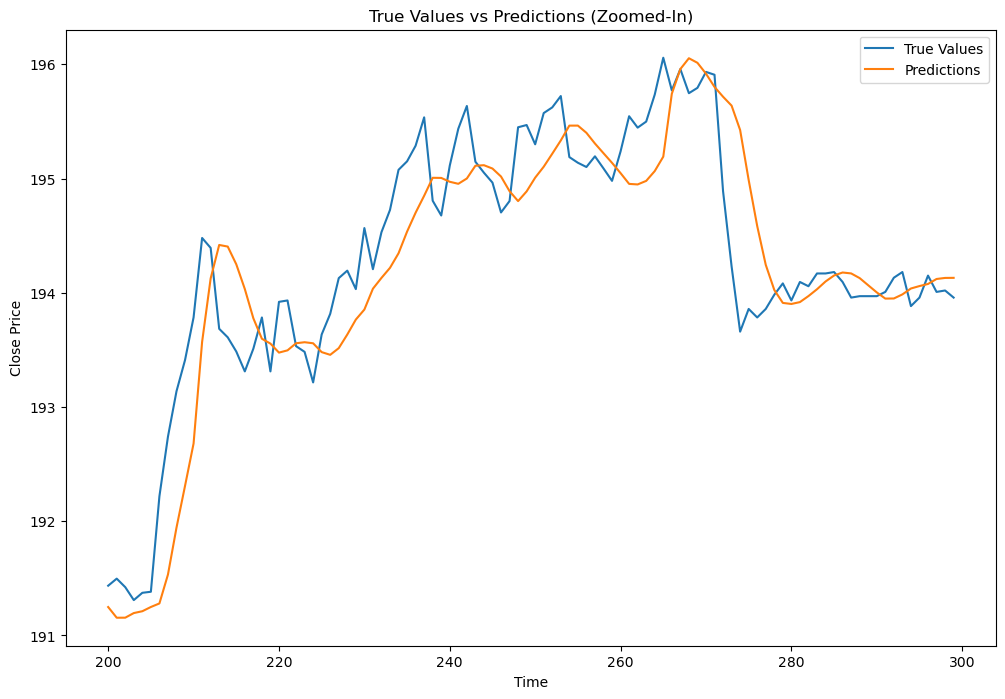

In [367]:
# ZOOMED IN PLOT: zoomed-in plots for specific time periods to examine the model's performance in greater detail.
# Define a range to zoom in
start, end = 200, 300

# Plot zoomed-in view
plt.figure(figsize=(12, 8))
plt.plot(y_rescaled_series[start:end], label='True Values')
plt.plot(test_predict_series[start:end], label='Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('True Values vs Predictions (Zoomed-In)')
plt.legend()
plt.show()


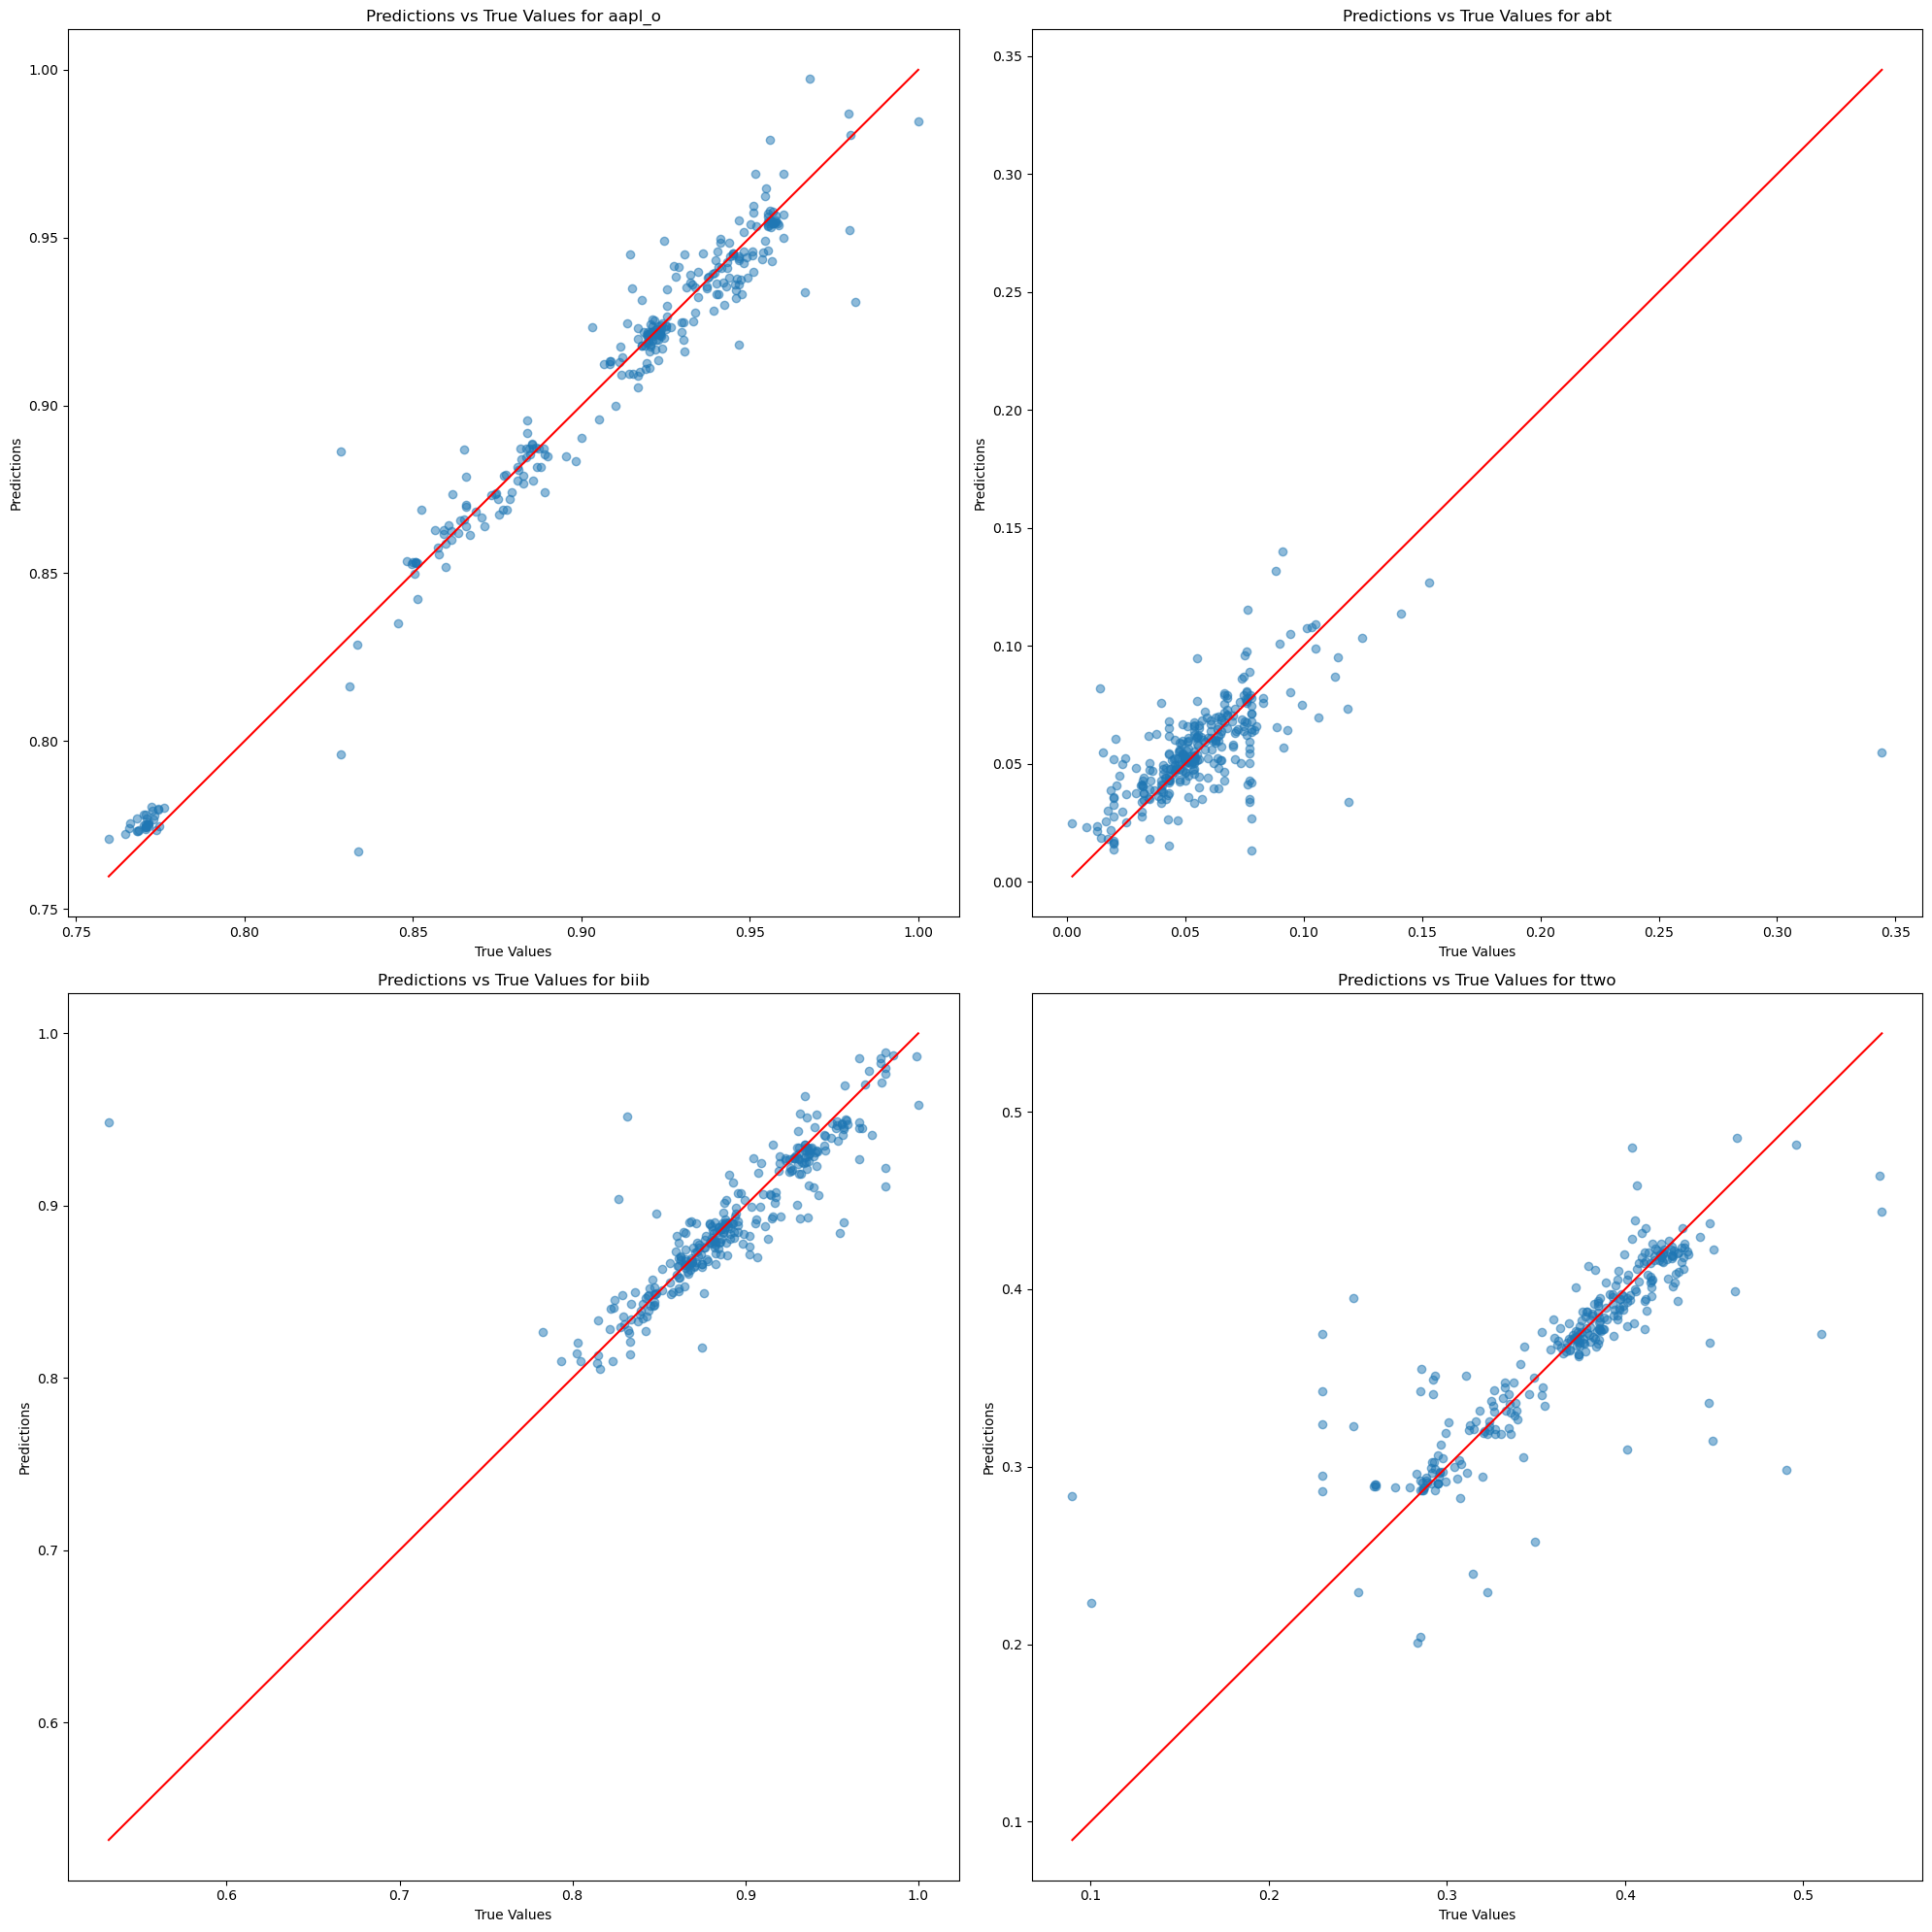

In [627]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs = axs.flatten()

# Plot predictions vs actual values for the specified companies
for i, company in enumerate(companies4):
    true_values = true_values_dict[company]
    predicted_values = predictions_dict[company]
    
    axs[i].scatter(true_values, predicted_values, alpha=0.5)
    axs[i].set_xlabel('True Values')
    axs[i].set_ylabel('Predictions')
    axs[i].set_title(f'Predictions vs True Values for {company}')
    axs[i].plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r')  # Diagonal line

plt.tight_layout()
plt.savefig('PredVSTrue.png', dpi=200)

##### Quantitative Metrics to evaluate the model

In [369]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Individual
# Calculate MAE
mae = mean_absolute_error(y_rescaled_series, test_predict_series)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate MSE
mse = mean_squared_error(y_rescaled_series, test_predict_series)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared
r2 = r2_score(y_rescaled_series, test_predict_series)
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.3787
Mean Squared Error (MSE): 0.3751
R-squared (R²): 0.9786


In [628]:
# Dictionary to store the metrics for each company
metrics = {}

# Calculate metrics for each company
for company in companies4:
    true_values = true_values_dict[company]
    predicted_values = predictions_dict[company]
    
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    
    metrics[company] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

# Print the metrics for each company
for company, metric in metrics.items():
    print(f"{company} - MAE: {metric['MAE']:.4f}, MSE: {metric['MSE']:.4f}, R²: {metric['R²']:.4f}")


aapl_o - MAE: 0.0061, MSE: 0.0001, R²: 0.9678
abt - MAE: 0.0118, MSE: 0.0005, R²: 0.3048
biib - MAE: 0.0122, MSE: 0.0009, R²: 0.6190
ttwo - MAE: 0.0179, MSE: 0.0012, R²: 0.6676


# Plotting the Trading Simulation


Trading for aapl_o
Profit: $19473.53
Return on Investment (ROI): 19.47%
Sharpe Ratio: 1.13

Trading for abt
Profit: $1540228534.16
Return on Investment (ROI): 1540228.53%
Sharpe Ratio: 1.86

Trading for biib
Profit: $182715.69
Return on Investment (ROI): 182.72%
Sharpe Ratio: 1.41

Trading for ttwo
Profit: $3304935.73
Return on Investment (ROI): 3304.94%
Sharpe Ratio: 1.79
  Company        Profit           ROI  Sharpe Ratio
0  aapl_o  1.947353e+04  1.947353e+01      1.132944
1     abt  1.540229e+09  1.540229e+06      1.860657
2    biib  1.827157e+05  1.827157e+02      1.414487
3    ttwo  3.304936e+06  3.304936e+03      1.785261


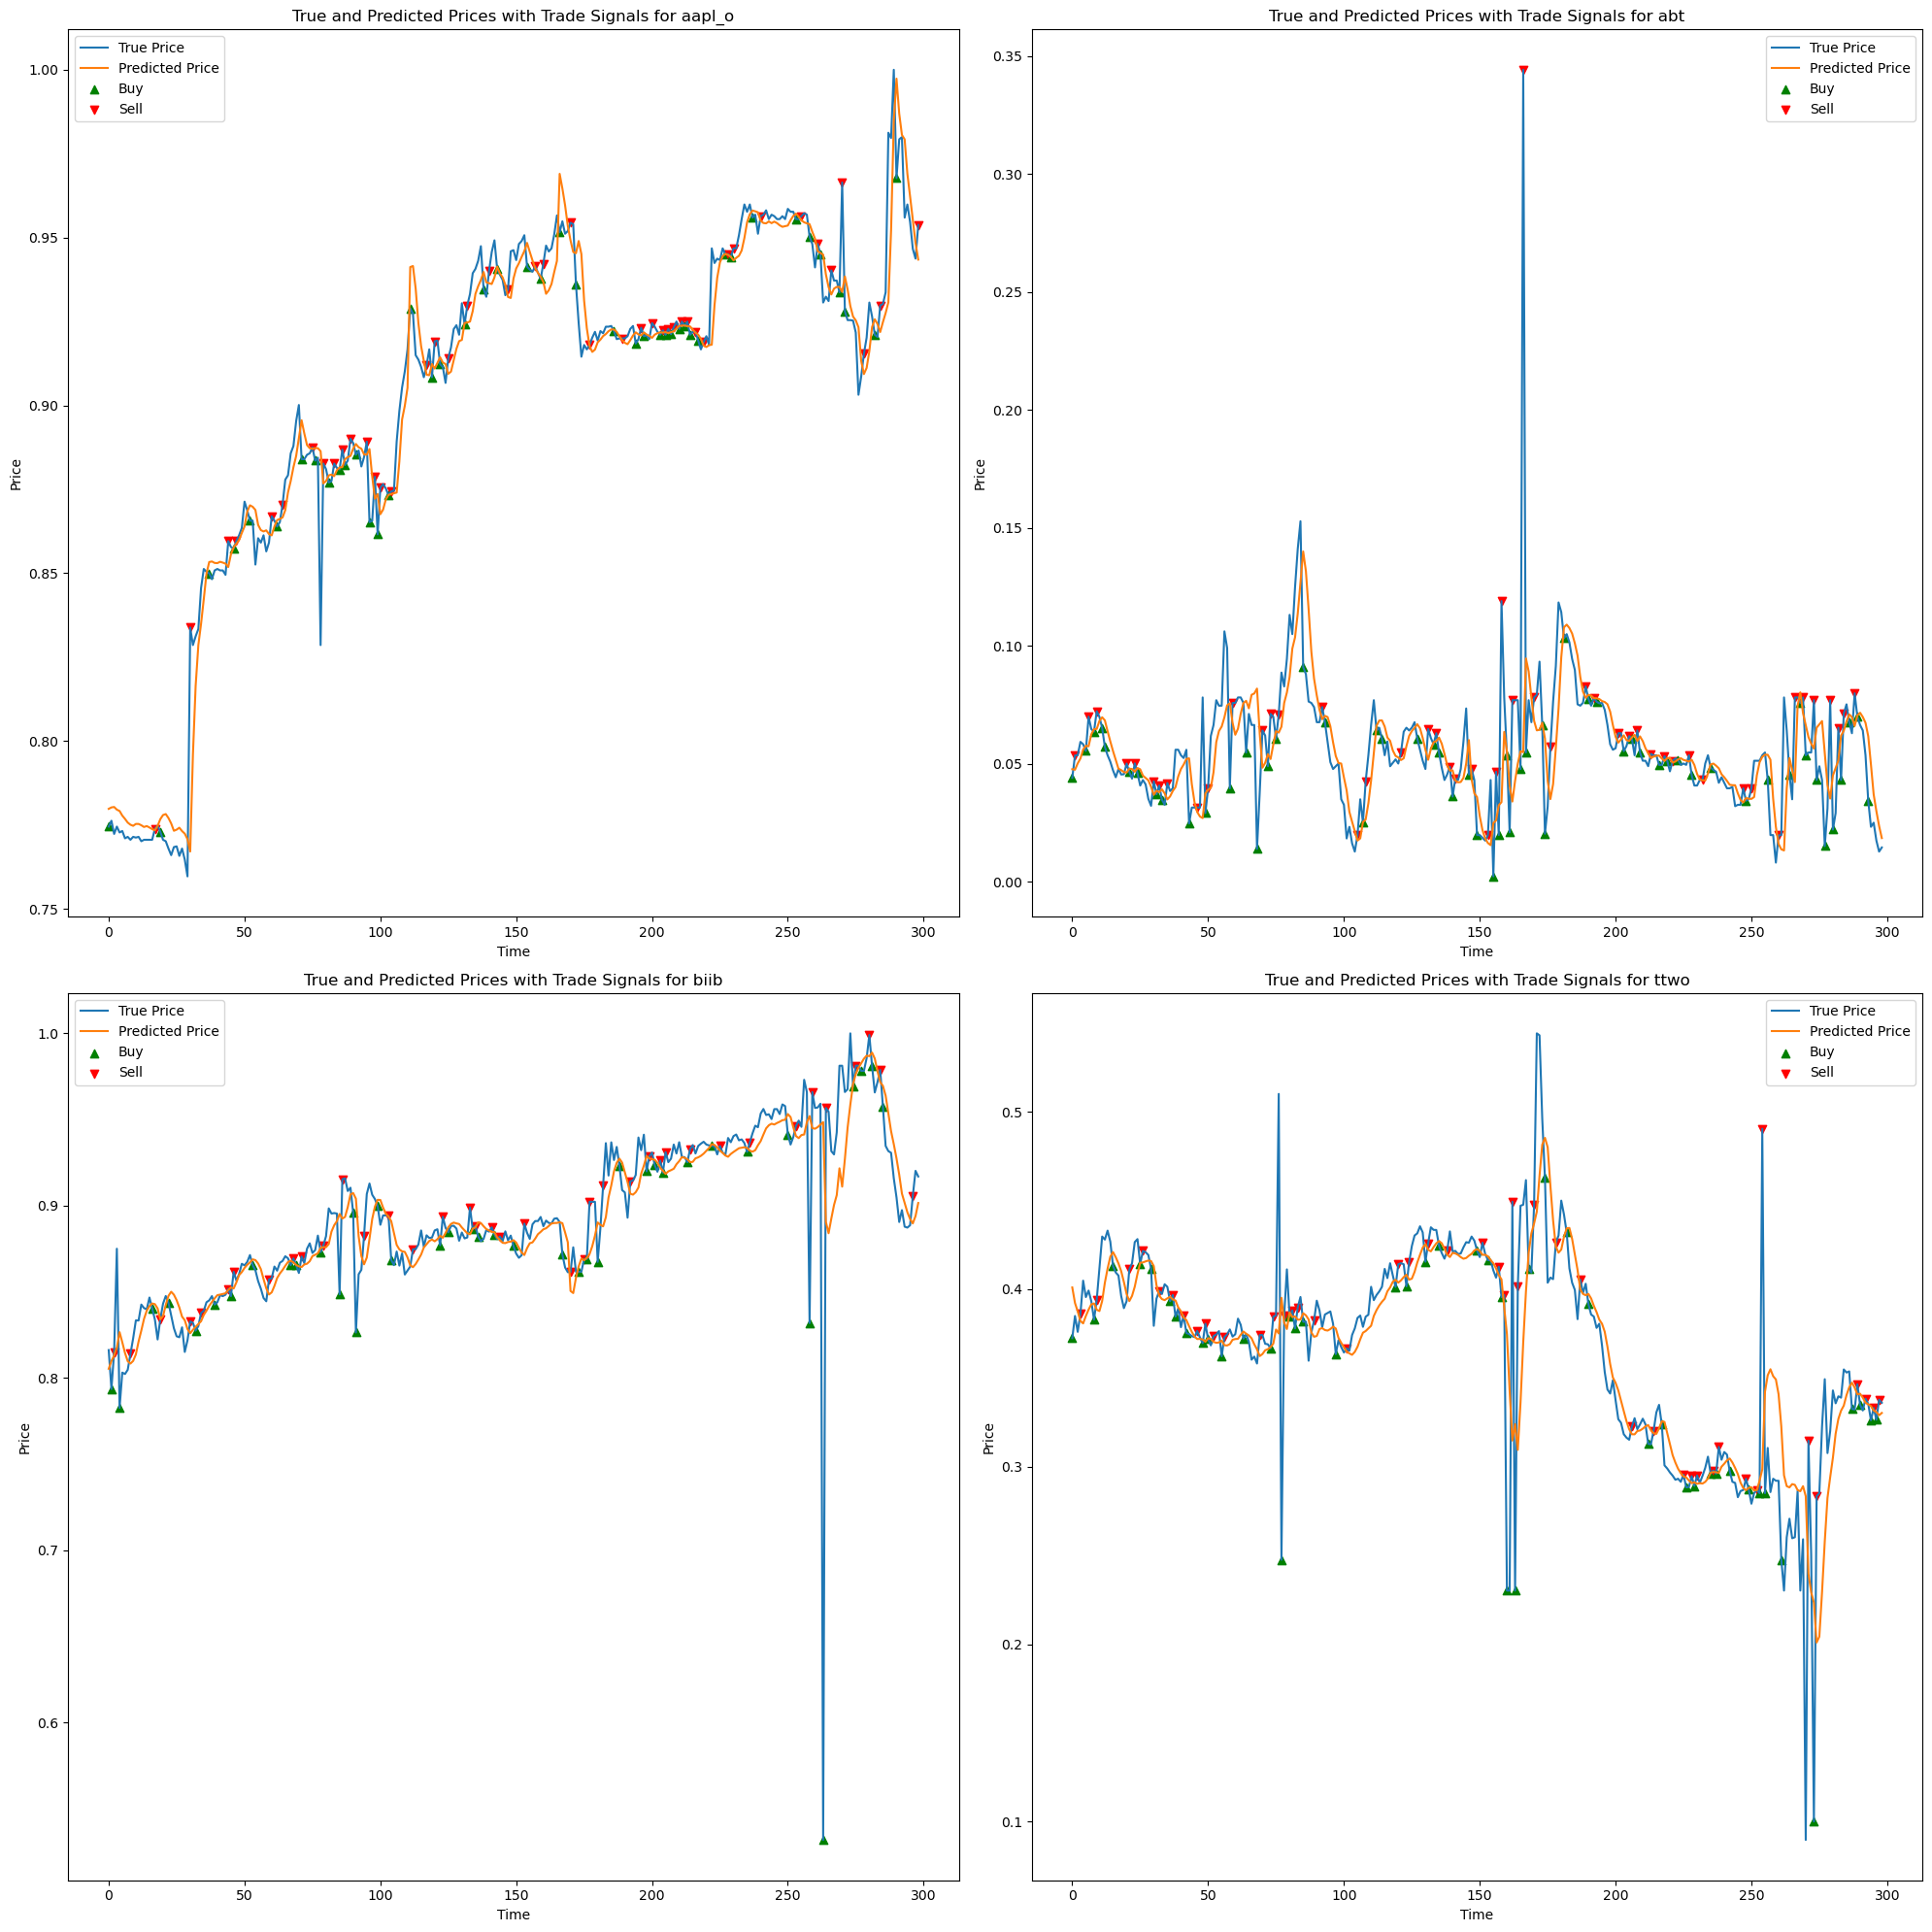

In [632]:
# For 4 different companies


initial_cash = 100000  # Starting with $100,000
results = []

# Define trading rules
def trading_strategy(predicted_price, current_price, positions, cash):
    action = 'hold'
    if predicted_price > current_price and cash > current_price:
        action = 'buy'
    elif predicted_price < current_price and positions > 0:
        action = 'sell'
    return action


# Initialize the figure for 2x2 subplot matrix
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()

# Iterate over each company to simulate trading
for idx, company in enumerate(companies4):
    print(f"\nTrading for {company}")
    
    # Fetch the true values and predictions
    y_rescaled_series = np.array(true_values_dict[company])
    test_predict_series = np.array(predictions_dict[company])
    
    # Initialize variables for each company
    cash = initial_cash
    positions = 0
    portfolio_value = []
    trades = []

    # Simulate trading process
    for i in range(len(y_rescaled_series)):
        current_price = y_rescaled_series[i]
        predicted_price = test_predict_series[i]

        action = trading_strategy(predicted_price, current_price, positions, cash)

        if action == 'buy':
            positions += cash // current_price
            cash %= current_price
            trades.append((i, 'buy', current_price))
        elif action == 'sell':
            cash += positions * current_price
            positions = 0
            trades.append((i, 'sell', current_price))

        portfolio_value.append(cash + positions * current_price)

    # Convert portfolio value to a pandas Series for easier plotting and analysis
    portfolio_value_series = pd.Series(portfolio_value, index=range(len(y_rescaled_series)))

    # Calculate performance metrics
    final_cash = cash + positions * y_rescaled_series[-1]
    profit = final_cash - initial_cash
    roi = (final_cash - initial_cash) / initial_cash * 100
    returns = portfolio_value_series.pct_change().dropna()
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

    # Store results
    results.append({
        'Company': company,
        'Profit': profit,
        'ROI': roi,
        'Sharpe Ratio': sharpe_ratio
    })
    
    # Print performance metrics
    print(f"Profit: ${profit:.2f}")
    print(f"Return on Investment (ROI): {roi:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

    # Plot the true and predicted prices along with trade signals
    axs[idx].plot(y_rescaled_series, label='True Price')
    axs[idx].plot(test_predict_series, label='Predicted Price')

    # Mark buy and sell points
    for trade in trades:
        if trade[1] == 'buy':
            axs[idx].scatter(trade[0], trade[2], marker='^', color='green', label='Buy')
        elif trade[1] == 'sell':
            axs[idx].scatter(trade[0], trade[2], marker='v', color='red', label='Sell')

    # Set the title and labels
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Price')
    axs[idx].set_title(f'True and Predicted Prices with Trade Signals for {company}')
    
    # Avoid duplicate labels in legend
    handles, labels = axs[idx].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[idx].legend(by_label.values(), by_label.keys())

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Trading_results', dpi=200)

# Display a summary of results
results_df = pd.DataFrame(results)
print(results_df)


# Autokeras
kind of failed (very small amount of parameters) but I used the optimal model anyway because it was taking too much time

Trial 29 Complete [00h 07m 08s]
val_loss: 0.00017491231847088784

Best val_loss So Far: 7.355476554948837e-05
Total elapsed time: 13h 03m 12s
Epoch 1/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 2/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 3/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 5/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 6/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 7/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 8/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 9/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.001

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 72, 5)          │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_head_1 (Dense)       │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366 (1.43 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.8018e-05 - mean_squared_error: 6.8146e-05
Best model evaluation: [7.870546687627211e-05, 7.998629007488489e-05]


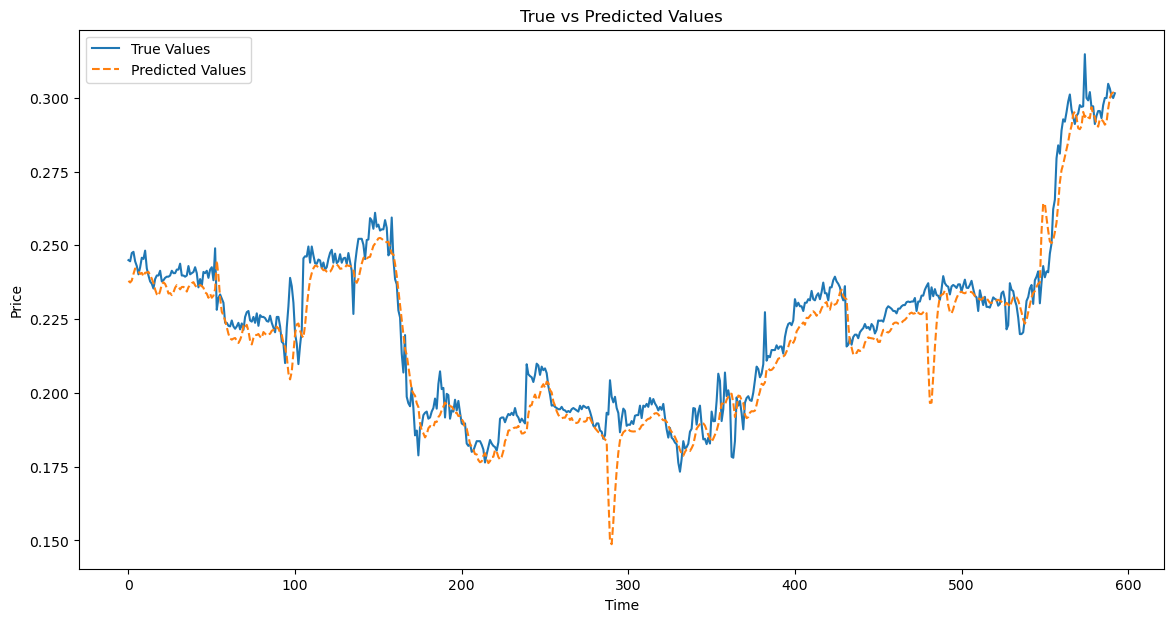

In [290]:
import os
import autokeras as ak
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming X_train, y_train, X_test, y_test are already defined

# Reshape the data if necessary
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Define the input node
input_node = ak.Input()

# Define the task node
output_node = ak.RNNBlock()(input_node)
output_node = ak.RegressionHead()(output_node)

# Build the AutoModel
model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    max_trials=30,  # The maximum number of different models to try
    overwrite=True
)

# Use a high number of epochs and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the scaler on the training data
scaler = MinMaxScaler()
y_train_reshaped = y_train.reshape(-1, 1)
scaler.fit(y_train_reshaped)

# Train the model with early stopping
model.fit(X_train_reshaped, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

# Retrieve the best model
best_model = model.export_model()

# Summary of the best model
best_model.summary()

# Remove existing model file if it exists
if os.path.exists("best_model.keras"):
    os.remove("best_model.keras")

# Save the best model using the native Keras format
best_model.save("best_model.keras")

# Make predictions with the best model
predicted_y = best_model.predict(X_test_reshaped)

# Evaluate the model
evaluation = best_model.evaluate(X_test_reshaped, y_test)
print(f"Best model evaluation: {evaluation}")

# Inverse transform the predicted values and true values to the original scale
y_test_reshaped = y_test.reshape(-1, 1)
y_rescaled = scaler.inverse_transform(y_test_reshaped).squeeze()

predicted_y_reshaped = predicted_y.reshape(-1, 1)
predicted_rescaled = scaler.inverse_transform(predicted_y_reshaped).squeeze()

# Convert to pandas Series for plotting
y_test_series = pd.Series(y_rescaled, name='True Values')
predicted_series = pd.Series(predicted_rescaled, name='Predicted Values')

# Plot the true and predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_series, label='True Values')
plt.plot(predicted_series, label='Predicted Values', linestyle='--')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [291]:
## Retrieve the best model
best_model = model.export_model()

# Print a detailed summary of the best model
best_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 72, 5)          │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_head_1 (Dense)       │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366 (1.43 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [300]:
optimizer_config = best_model.optimizer.get_config()

# Display the optimizer details
print(optimizer_config)

{'name': 'SGD', 'learning_rate': 0.009999999776482582, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'momentum': 0.0, 'nesterov': False}


# Looping the GRUs

In [642]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import random
import matplotlib.pyplot as plt

# Create the models_GRU directory if it does not exist
if not os.path.exists('models_GRU'):
    os.makedirs('models_GRU')

# Initialize the early stopping and model checkpoint callbacks
early_stopping_GRU = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Dictionary to store RMSE values for each company
rmse_values_GRU = {}

# Dictionaries to store predictions and true values
predictions_dict_GRU = {}
true_values_dict_GRU = {}

# Define a function to plot true values vs predictions
def plot_predictions_GRU(y_test, test_predictions, company_name, ax):
    ax.plot(y_test, label='True Values')
    ax.plot(test_predictions, label='Predictions')
    ax.set_xlabel('Time')
    ax.set_ylabel('Close Price')
    ax.set_title(f'{company_name}')
    ax.legend()

# Ensure the random seed is set before the loop
seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)

for company in companies:
    print(f"Processing company: {company}")

    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    
    # Fetch the train and test data for the current company
    X_train_GRU = globals()[f'X_train_{company}']
    y_train_GRU = globals()[f'y_train_{company}']
    X_test_GRU = globals()[f'X_test_{company}']
    y_test_GRU = globals()[f'y_test_{company}']
    
    # Define the architecture of the RNN with GRU
    number_of_features = X_train_GRU.shape[2]
    model_name_GRU = f'rnn_GRU_{company}'
    globals()[model_name_GRU] = Sequential([
        GRU(units=128, return_sequences=True, name=f'GRU_1_{company}', activation='tanh', input_shape=(12, number_of_features)),
        Dropout(0.3),
        GRU(units=128, name=f'GRU_2_{company}', activation='tanh'),
        Dropout(0.3),
        Dense(1, name=f'Output_{company}')
    ])
    
    # Compile the model with SGD optimizer
    optimizer_name_GRU = f'optimizer_GRU_{company}'
    globals()[optimizer_name_GRU] = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    globals()[model_name_GRU].compile(loss='mean_squared_error', optimizer=globals()[optimizer_name_GRU])
    
    # Define the model checkpoint callback
    checkpoint_filepath_GRU = f'models_GRU/model_{company.replace(".", "_").lower()}.keras'
    globals()[f'checkpointer_GRU_{company}'] = ModelCheckpoint(filepath=checkpoint_filepath_GRU, verbose=1, save_best_only=True, monitor='val_loss')
    
    # Train the model
    globals()[f'gru_training_{company}'] = globals()[model_name_GRU].fit(
        X_train_GRU, y_train_GRU,
        epochs=100,
        batch_size=32,
        validation_data=(X_test_GRU, y_test_GRU),
        callbacks=[globals()[f'checkpointer_GRU_{company}'], early_stopping_GRU],
        verbose=1
    )
    
    # Load the best weights
    globals()[model_name_GRU].load_weights(checkpoint_filepath_GRU)
    
    # Evaluate the model
    evaluation_GRU = globals()[model_name_GRU].evaluate(X_test_GRU, y_test_GRU)
    print(f'Final model evaluation for {company}: {evaluation_GRU}')
    
    # Store RMSE values
    loss_history_GRU = pd.DataFrame(globals()[f'gru_training_{company}'].history).pow(.5)
    rmse_values_GRU[company] = loss_history_GRU

    # Make predictions
    test_predict_scaled_GRU = globals()[model_name_GRU].predict(X_test_GRU)
    
    # Store predictions and true values in dictionaries
    predictions_dict_GRU[company] = test_predict_scaled_GRU.squeeze()
    true_values_dict_GRU[company] = y_test_GRU.squeeze()


Processing company: aapl_o


/Users/shpetimtafili/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0465
Epoch 1: val_loss improved from inf to 0.00017, saving model to models_GRU/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0462 - val_loss: 1.7486e-04
Epoch 2/100
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0034
Epoch 2: val_loss did not improve from 0.00017
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0033 - val_loss: 8.2999e-04
Epoch 3/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0026
Epoch 3: val_loss did not improve from 0.00017
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0026 - val_loss: 2.6933e-04
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0023
Epoch 4: val_loss did not improve from 0.00017
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0023 - val_loss: 4.8624e-04
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0020
Epoch 5: val_loss improved from 0.00017 to 0.00016, saving model to models_GRU/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━

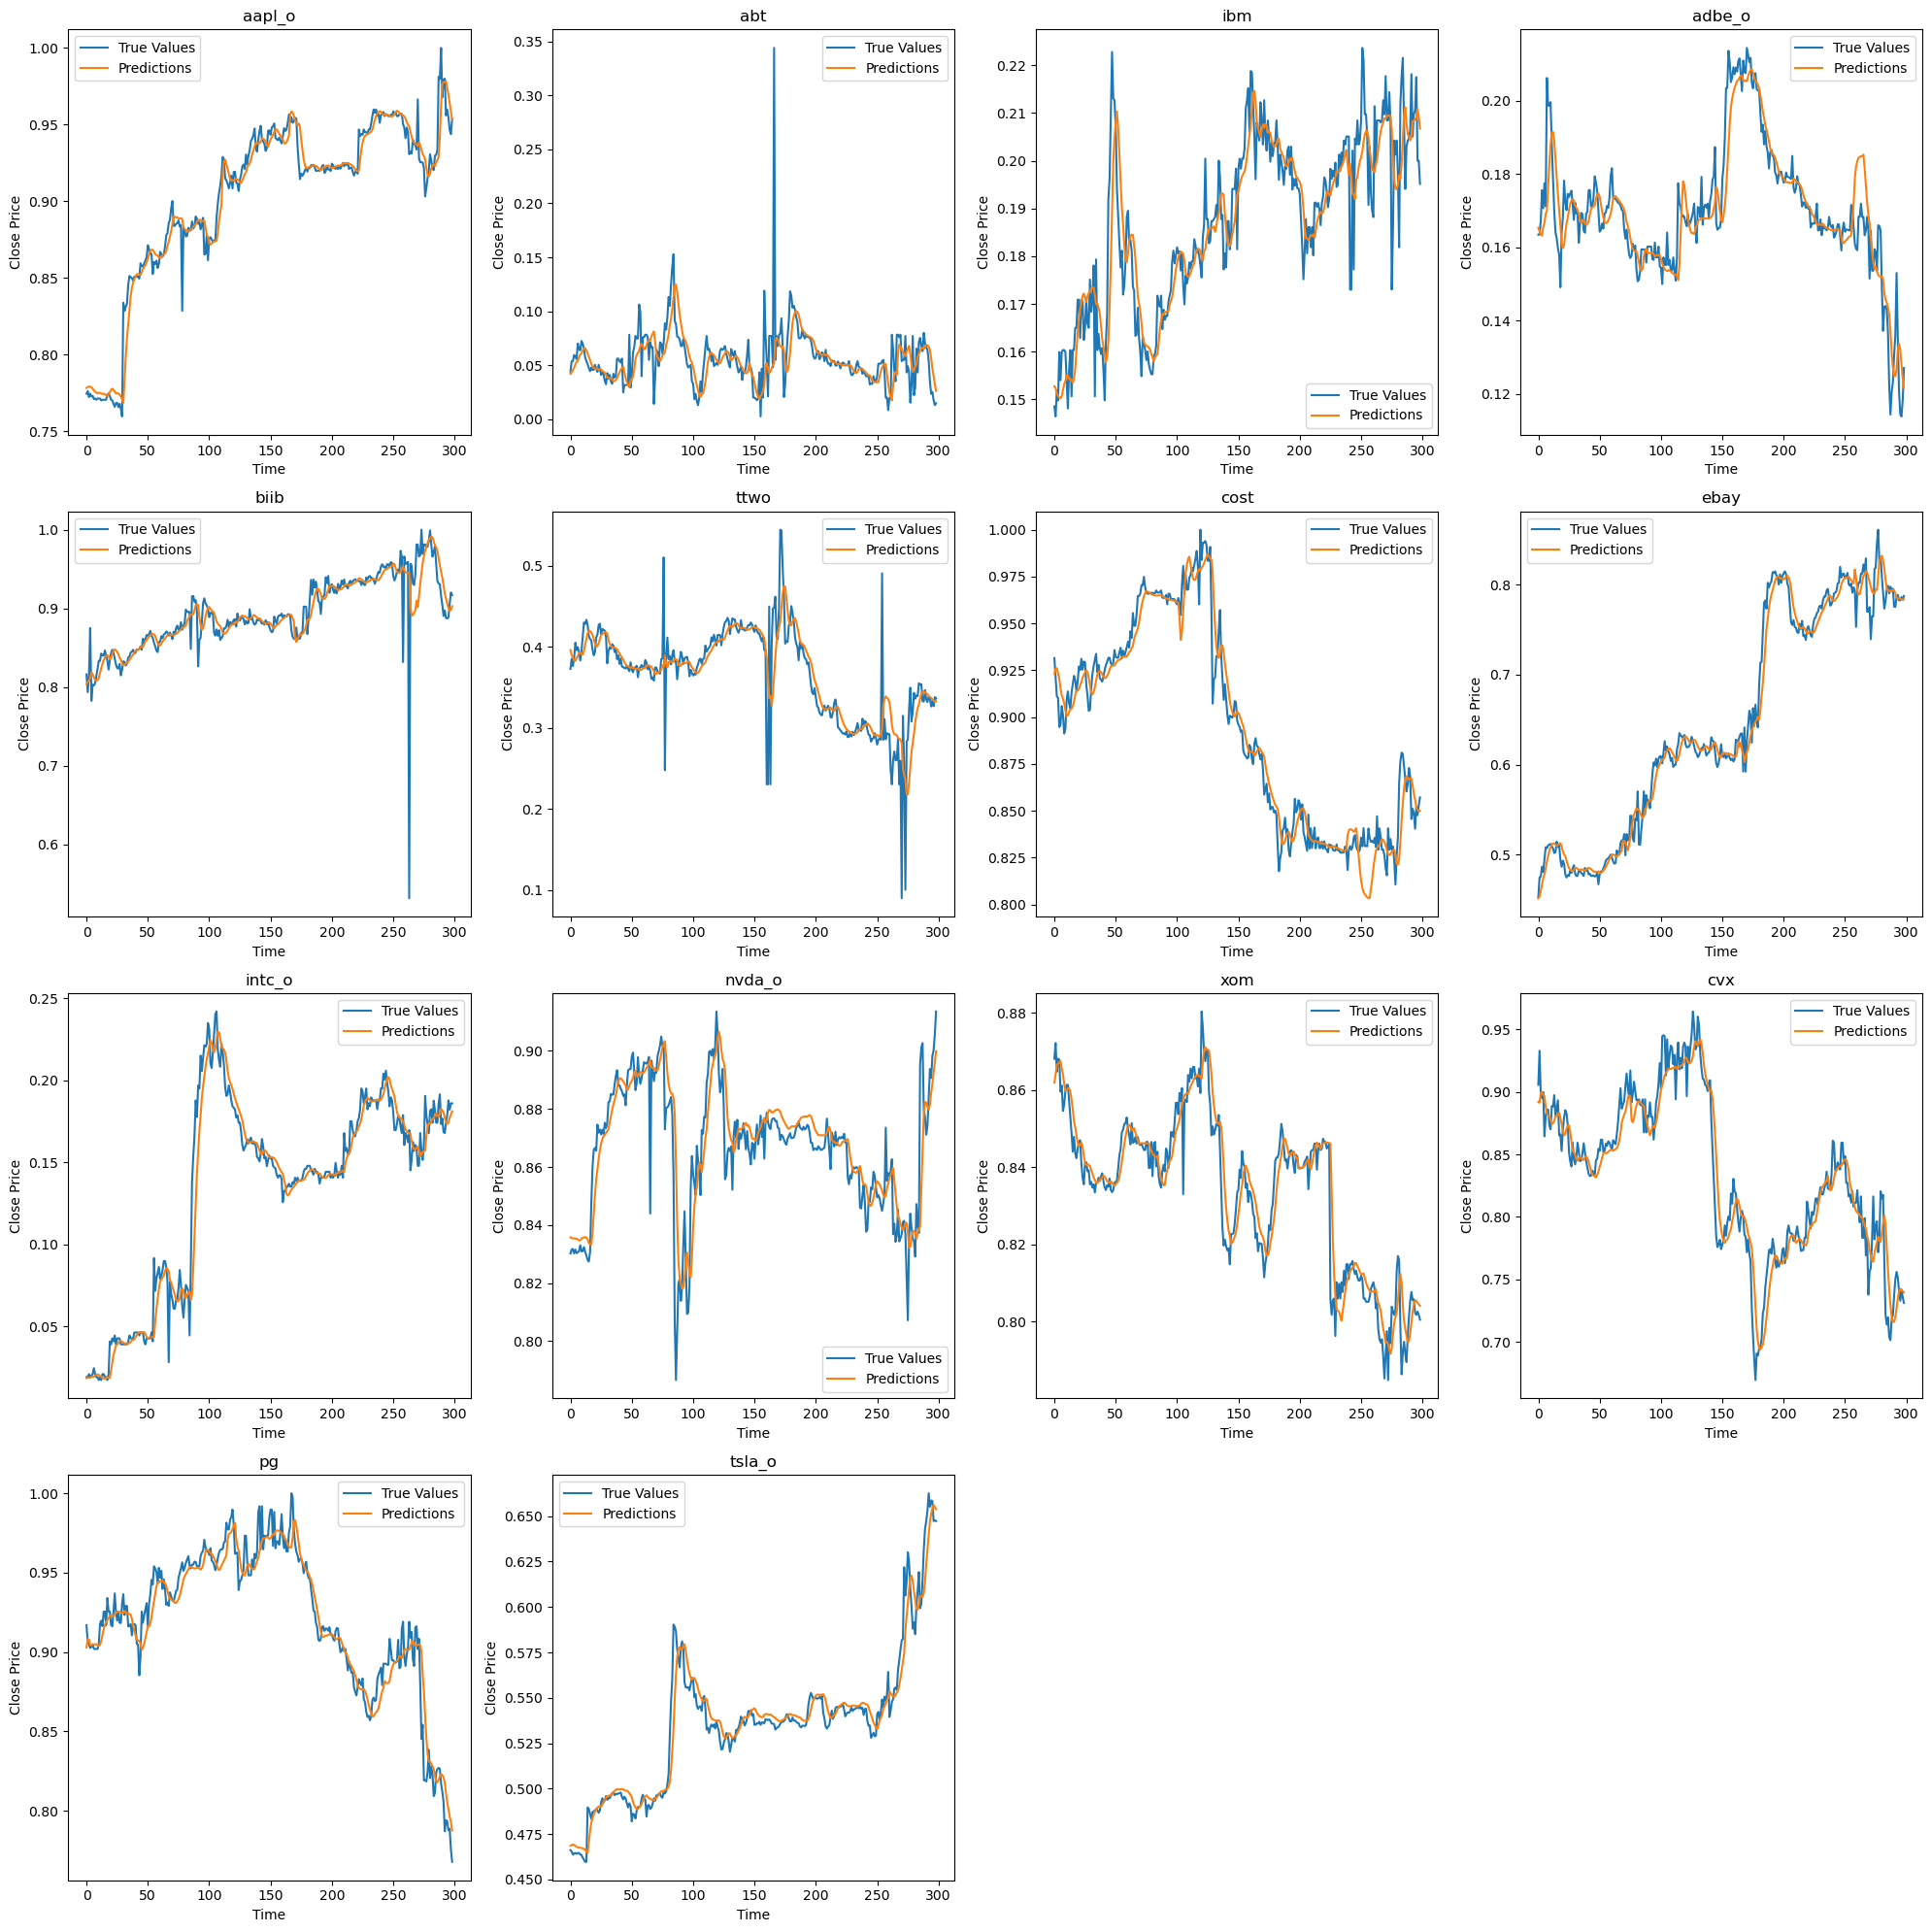

In [664]:
# Create the subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# Plot predictions for the specified companies
for i, company in enumerate(companies):
    plot_predictions_GRU(true_values_dict_GRU[company], predictions_dict_GRU[company], company, axs[i])

# Hide any unused subplots
for i in range(len(companies), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('4Predictions_GRU', dpi = 200)

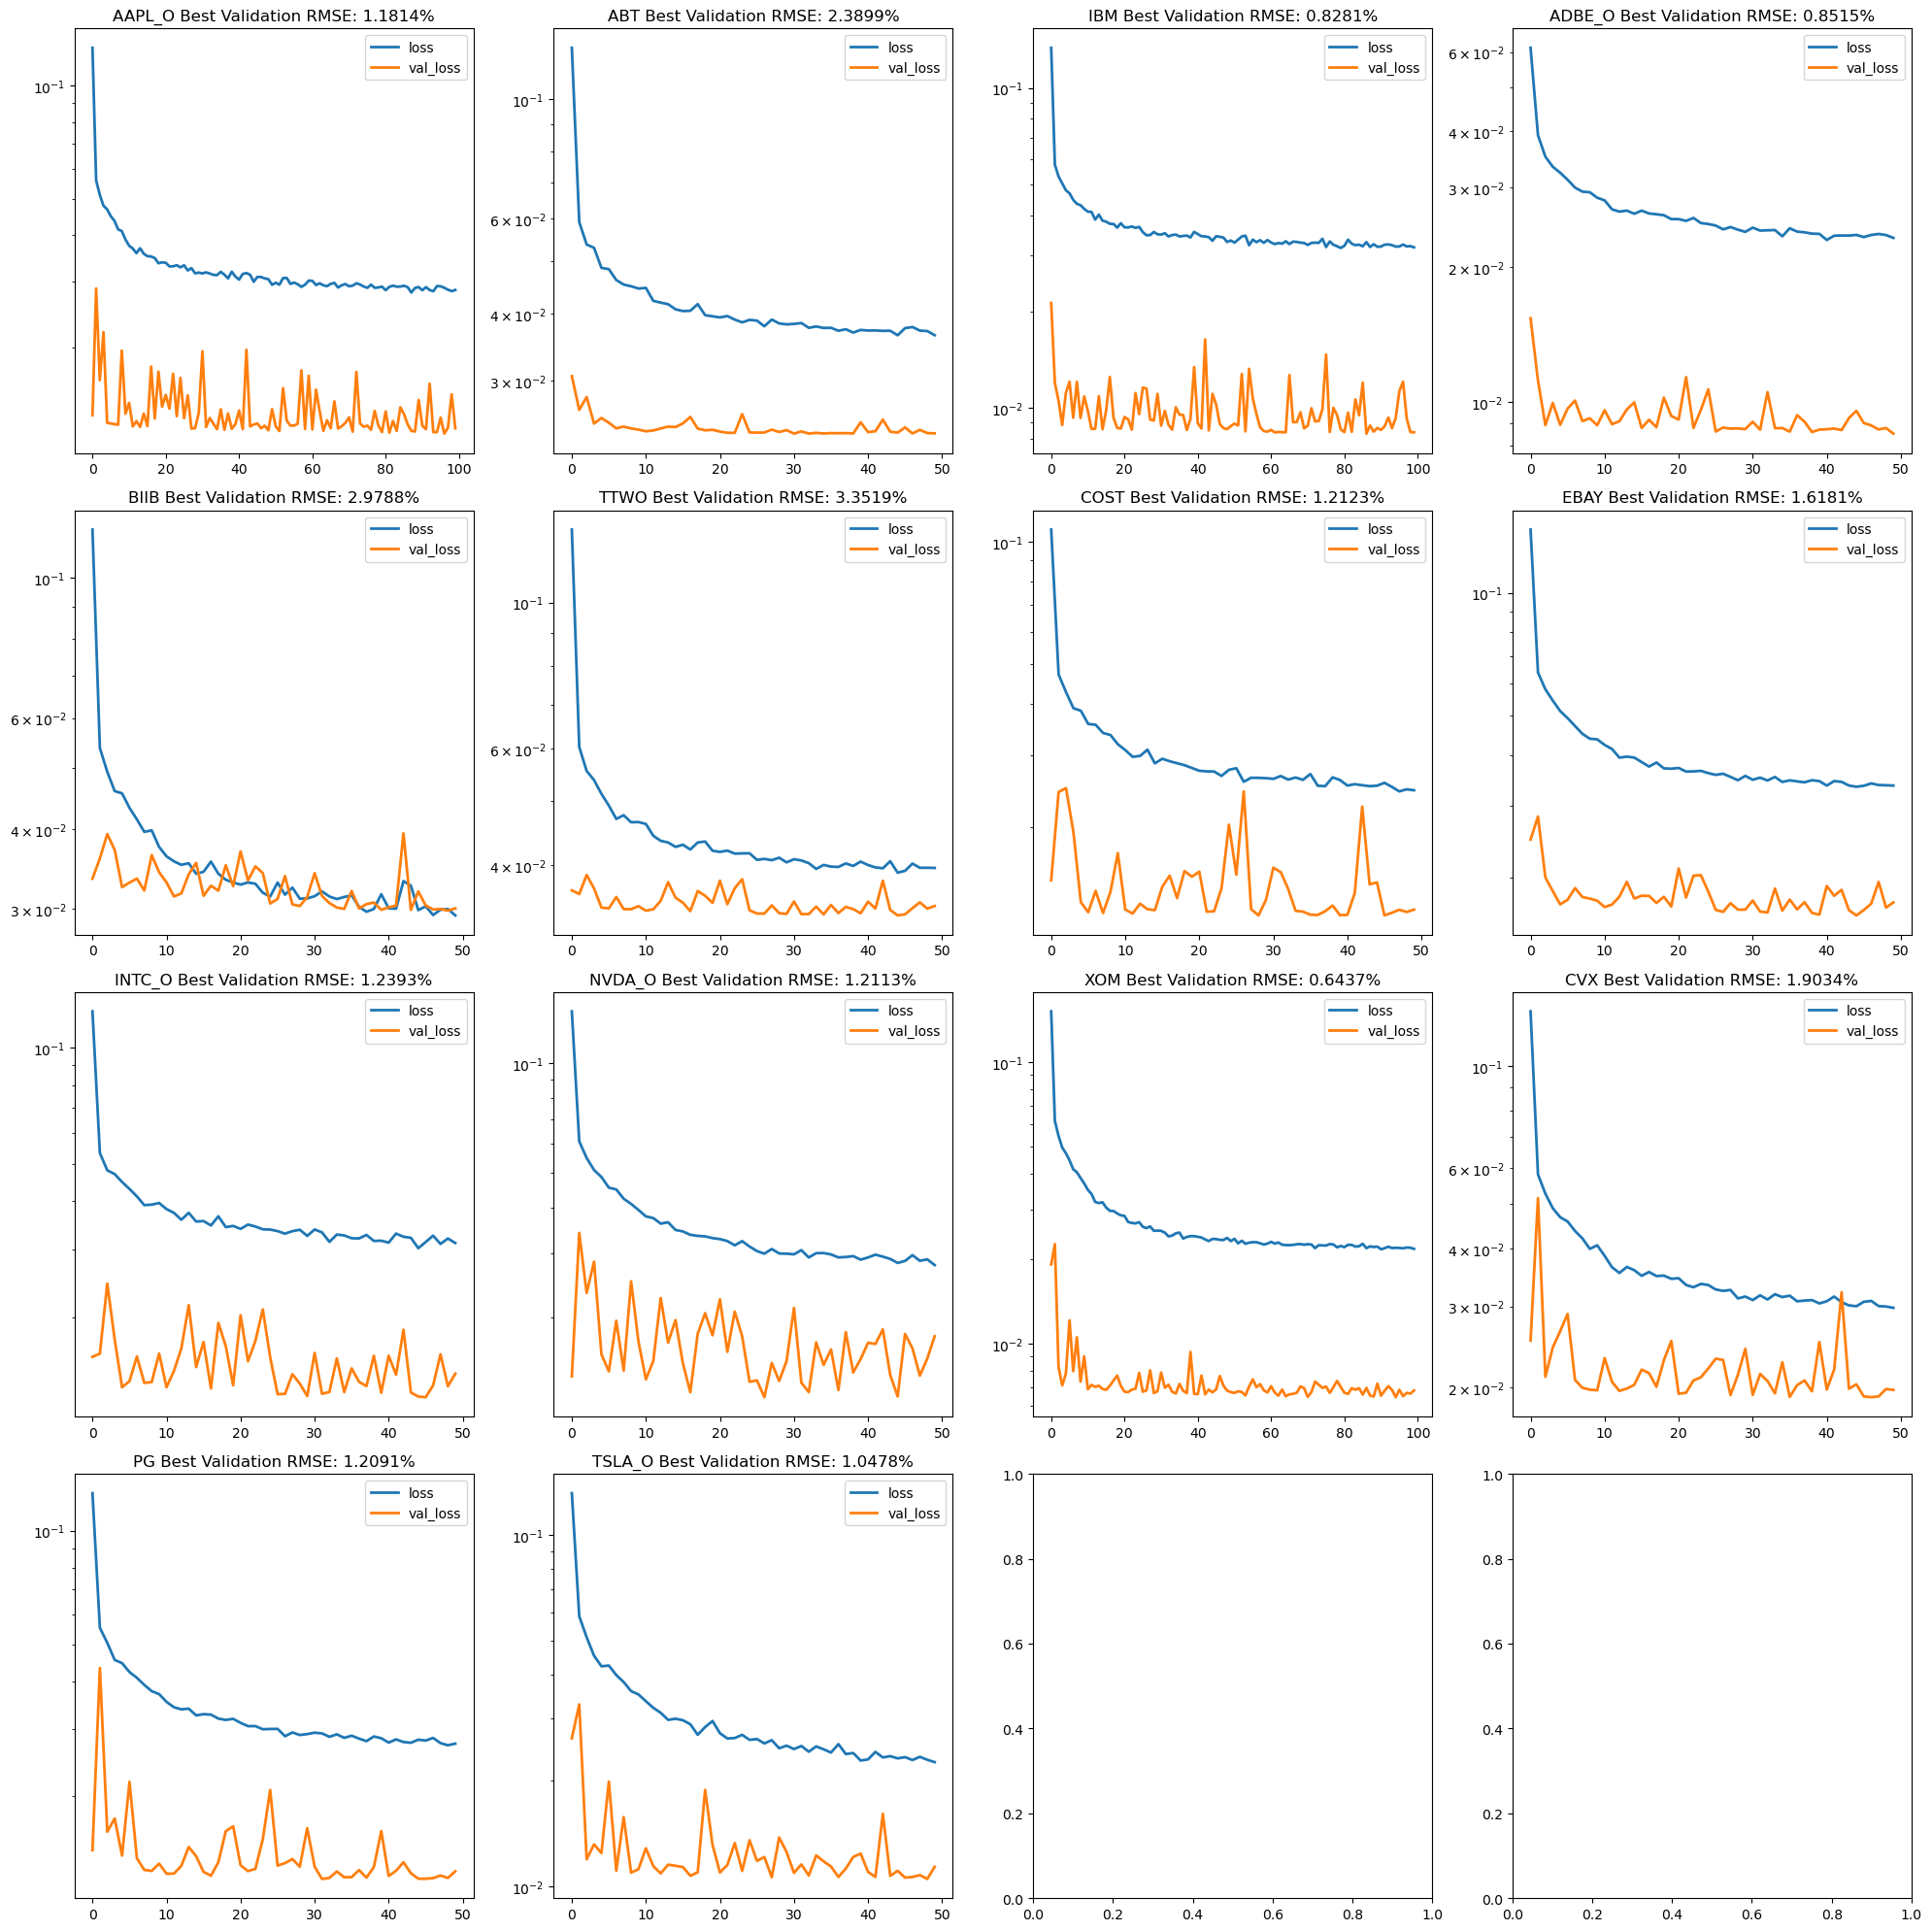

In [657]:
# Plotting RMSE for all companies
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for ax, (company, history) in zip(axs.flatten(), rmse_values_GRU.items()):
    best_rmse_GRU = history['val_loss'].min()
    best_epoch_GRU = history['val_loss'].idxmin()
    title = f'{company.upper()} Best Validation RMSE: {best_rmse_GRU:.4%}'
    
    history[['loss', 'val_loss']].plot(logy=True, lw=2, ax=ax, title=title)

plt.tight_layout()
plt.show()

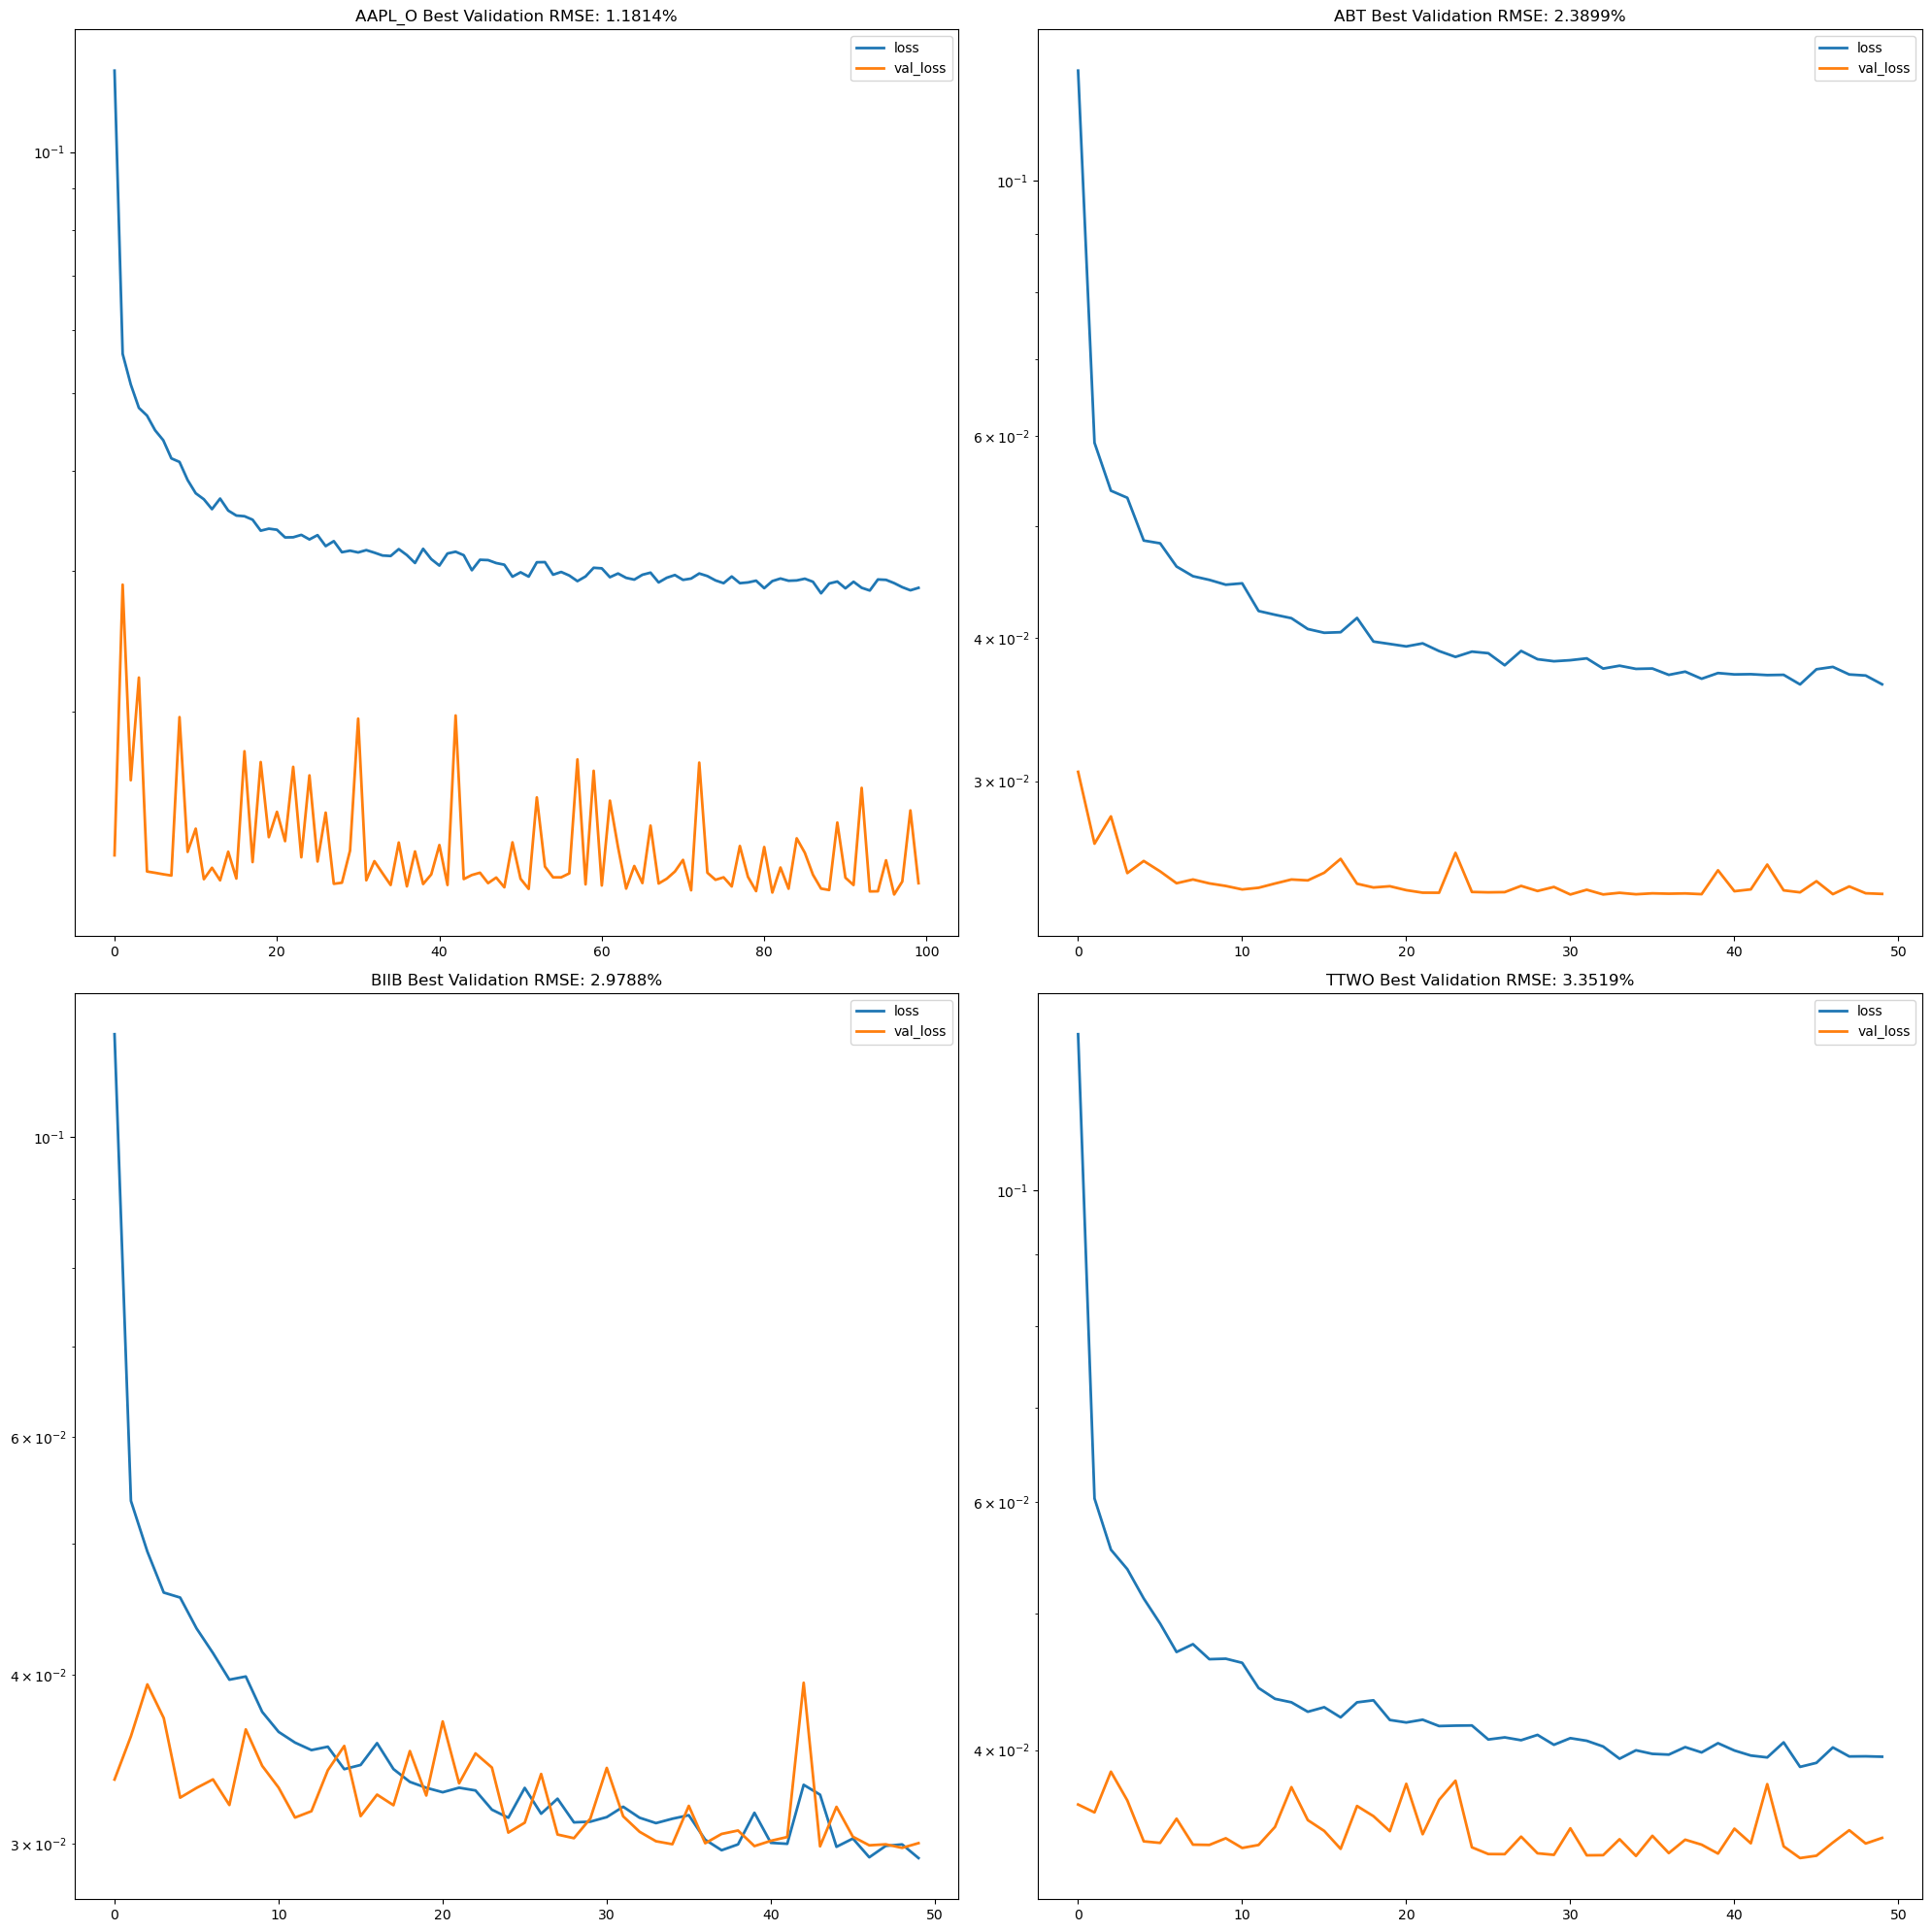

In [659]:
# Filter rmse_values_GRU to only include the companies in companies4
filtered_rmse_values_GRU = {company: rmse_values_GRU[company] for company in companies4}

# Plotting RMSE for the filtered companies
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for ax, (company, history) in zip(axs.flatten(), filtered_rmse_values_GRU.items()):
    best_rmse_GRU = history['val_loss'].min()
    best_epoch_GRU = history['val_loss'].idxmin()
    title = f'{company.upper()} Best Validation RMSE: {best_rmse_GRU:.4%}'
    
    history[['loss', 'val_loss']].plot(logy=True, lw=2, ax=ax, title=title)

plt.tight_layout()
plt.savefig('4RMSE_GRU', dpi = 200)

In [662]:
metrics_GRU = {}
# Calculate metrics for each company
for company in companies4:
    true_values = true_values_dict_GRU[company]
    predicted_values = predictions_dict_GRU[company]
    
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    
    metrics_GRU[company] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

# Print the metrics for each company
for company, metric in metrics_GRU.items():
    print(f"{company} - MAE: {metric['MAE']:.4f}, MSE: {metric['MSE']:.4f}, R²: {metric['R²']:.4f}")

aapl_o - MAE: 0.0068, MSE: 0.0001, R²: 0.9596
abt - MAE: 0.0130, MSE: 0.0006, R²: 0.2427
biib - MAE: 0.0127, MSE: 0.0009, R²: 0.6068
ttwo - MAE: 0.0184, MSE: 0.0012, R²: 0.6624


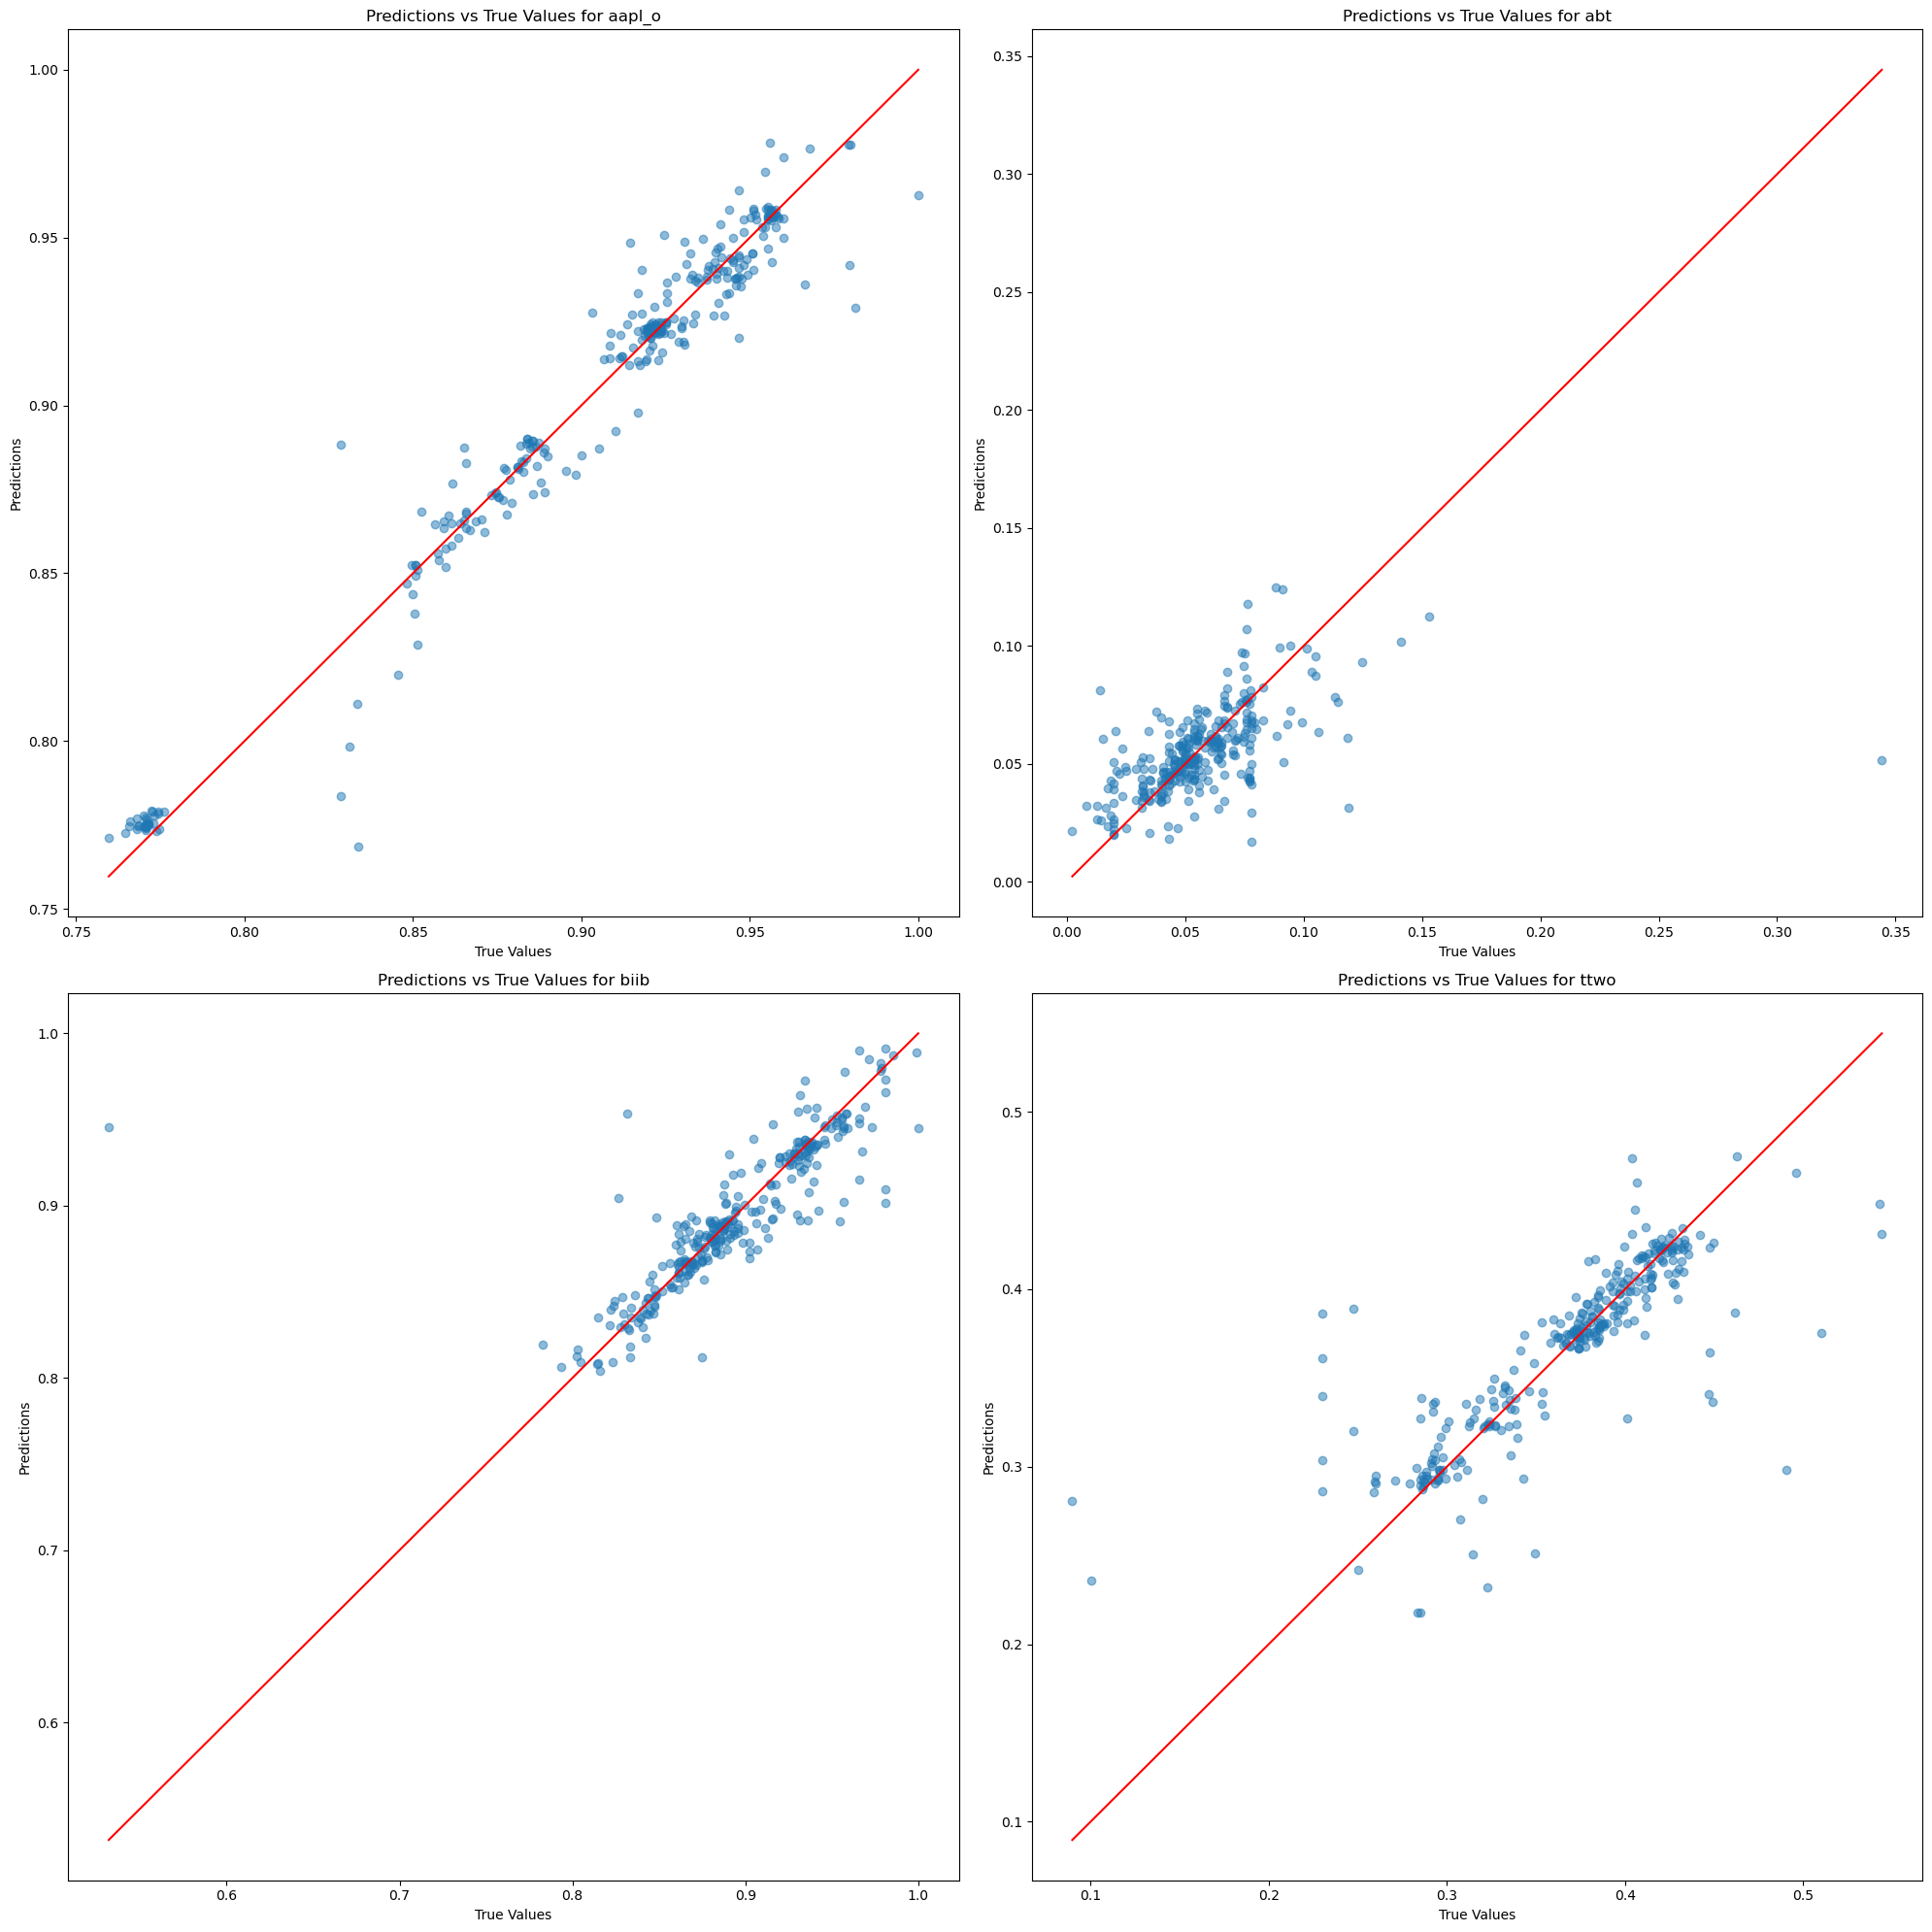

In [661]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs = axs.flatten()
# Plot predictions vs actual values for the specified companies
for i, company in enumerate(companies4):
    true_values = true_values_dict_GRU[company]
    predicted_values = predictions_dict_GRU[company]
    
    axs[i].scatter(true_values, predicted_values, alpha=0.5)
    axs[i].set_xlabel('True Values')
    axs[i].set_ylabel('Predictions')
    axs[i].set_title(f'Predictions vs True Values for {company}')
    axs[i].plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r')  # Diagonal line

plt.tight_layout()
plt.savefig('PredVSTrue_GRU.png', dpi=200)
plt.show()


Trading for aapl_o
Profit: $27782.78
Return on Investment (ROI): 27.78%
Sharpe Ratio: 1.52

Trading for abt
Profit: $30051309108.10
Return on Investment (ROI): 30051309.11%
Sharpe Ratio: 2.04

Trading for biib
Profit: $158301.59
Return on Investment (ROI): 158.30%
Sharpe Ratio: 1.31

Trading for ttwo
Profit: $1612259.88
Return on Investment (ROI): 1612.26%
Sharpe Ratio: 1.63
  Company        Profit           ROI  Sharpe Ratio
0  aapl_o  2.778278e+04  2.778278e+01      1.524408
1     abt  3.005131e+10  3.005131e+07      2.040114
2    biib  1.583016e+05  1.583016e+02      1.313463
3    ttwo  1.612260e+06  1.612260e+03      1.626496


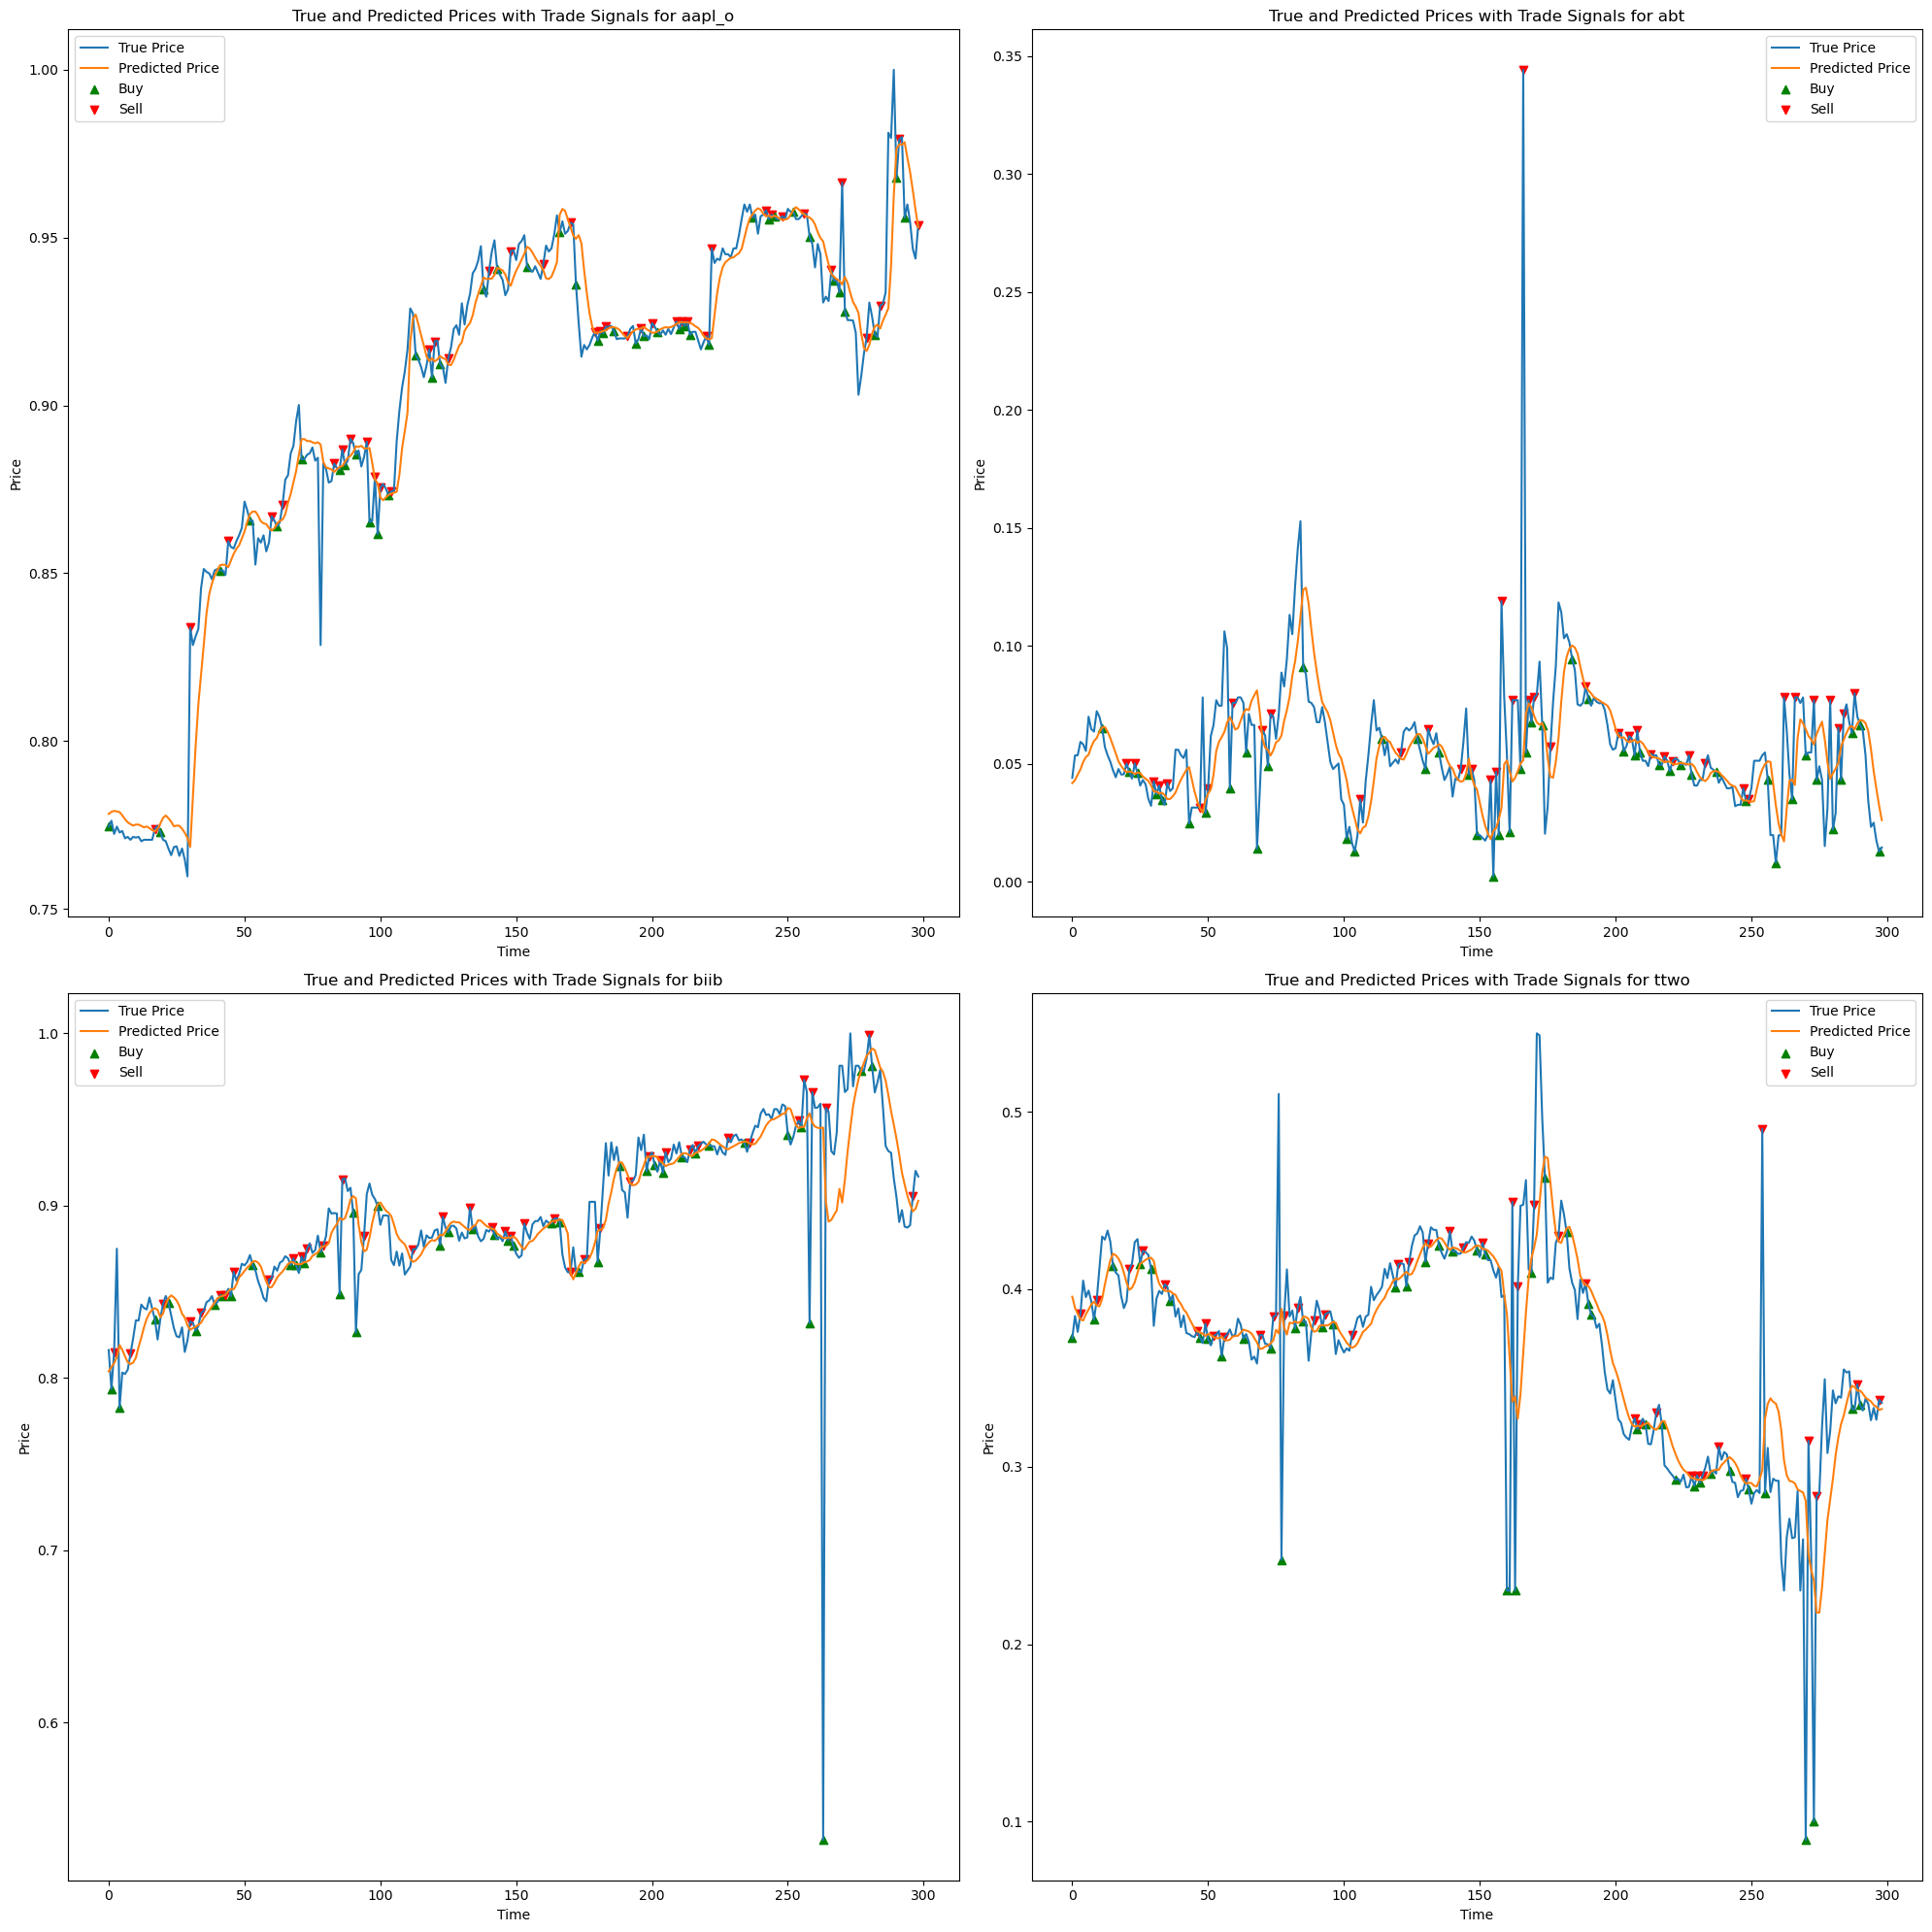

In [651]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the initial cash and an empty list to store results
initial_cash = 100000  # Starting with $100,000
results = []

# Define trading rules
def trading_strategy(predicted_price, current_price, positions, cash):
    action = 'hold'
    if predicted_price > current_price and cash > current_price:
        action = 'buy'
    elif predicted_price < current_price and positions > 0:
        action = 'sell'
    return action

# Initialize the figure for 2x2 subplot matrix
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()

# Iterate over each company to simulate trading
for idx, company in enumerate(companies4):
    print(f"\nTrading for {company}")
    
    # Fetch the true values and predictions
    y_rescaled_series = np.array(true_values_dict_GRU[company])
    test_predict_series = np.array(predictions_dict_GRU[company])
    
    # Initialize variables for each company
    cash = initial_cash
    positions = 0
    portfolio_value = []
    trades = []

    # Simulate trading process
    for i in range(len(y_rescaled_series)):
        current_price = y_rescaled_series[i]
        predicted_price = test_predict_series[i]

        action = trading_strategy(predicted_price, current_price, positions, cash)

        if action == 'buy':
            positions += cash // current_price
            cash %= current_price
            trades.append((i, 'buy', current_price))
        elif action == 'sell':
            cash += positions * current_price
            positions = 0
            trades.append((i, 'sell', current_price))

        portfolio_value.append(cash + positions * current_price)

    # Convert portfolio value to a pandas Series for easier plotting and analysis
    portfolio_value_series = pd.Series(portfolio_value, index=range(len(y_rescaled_series)))

    # Calculate performance metrics
    final_cash = cash + positions * y_rescaled_series[-1]
    profit = final_cash - initial_cash
    roi = (final_cash - initial_cash) / initial_cash * 100
    returns = portfolio_value_series.pct_change().dropna()
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns

    # Store results
    results.append({
        'Company': company,
        'Profit': profit,
        'ROI': roi,
        'Sharpe Ratio': sharpe_ratio
    })
    
    # Print performance metrics
    print(f"Profit: ${profit:.2f}")
    print(f"Return on Investment (ROI): {roi:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

    # Plot the true and predicted prices along with trade signals
    axs[idx].plot(y_rescaled_series, label='True Price')
    axs[idx].plot(test_predict_series, label='Predicted Price')

    # Mark buy and sell points
    for trade in trades:
        if trade[1] == 'buy':
            axs[idx].scatter(trade[0], trade[2], marker='^', color='green', label='Buy')
        elif trade[1] == 'sell':
            axs[idx].scatter(trade[0], trade[2], marker='v', color='red', label='Sell')

    # Set the title and labels
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Price')
    axs[idx].set_title(f'True and Predicted Prices with Trade Signals for {company}')
    
    # Avoid duplicate labels in legend
    handles, labels = axs[idx].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[idx].legend(by_label.values(), by_label.keys())

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Trading_results_GRU.png', dpi=200)

# Display a summary of results
results_df = pd.DataFrame(results)
print(results_df)
